# Problem Statement and Objectives:

**Problem Statement:**
Companies facing financial distress may default on their obligations, leading to a decline in credit ratings and limiting future access to credit. Defaults can result in increased interest rates on existing debt and create challenges for securing new financing. For investors and financial institutions, identifying companies at risk of default is crucial for managing credit risk and protecting financial stability. This project focuses on using financial data from companies' balance sheets to predict defaults and help stakeholders make informed decisions.

**Objectives:**
The primary objective is to build predictive models using financial data to identify companies likely to default. By leveraging machine learning models such as Logistic Regression, Random Forest, and LDA, and balancing data using SMOTE, the goal is to maximize recall (to minimize missed defaults) while maintaining reasonable precision. Additionally, the project aims to identify key financial indicators contributing to default risk and provide actionable insights for improving financial decision-making and managing credit risk effectively.









# Index
* <a href = #lel>Load Essential Libraries</a>
* <a href = #ld>Load Dataset</a>
* <a href = #do>Data Overview</a>
* <a href = #eda>Exploratory Data Analysis</a>
* <a href = #dp>Data Pre-processing</a>
* <a href = #mb>Model Building</a>
* <a href = #mcs>Model Comparison and Selection</a>
* <a href = #ir>Insights and Recommendations</a>

# <a name='lel'>Load Essential Libraries</a>

In [1]:
# Libraries for Data Manipulation and Numerical Operations
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation

# Set pandas display options for better readability of output
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Libraries for Data Visualization
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced visualizations

# Set Seaborn aesthetic parameters
sns.set(
    context='notebook',
    style='darkgrid',
    font='sans-serif',
    font_scale=0.8,
    rc={'figure.figsize': (20, 14)}
)

# Sci-Kit Learn Libraries for Model Evaluation, Tuning, and Train-Test Split
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting data and tuning models
from sklearn.metrics import (  # For calculating model performance metrics
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
)

# Sci-Kit Learn Libraries for Feature Scaling
from sklearn.preprocessing import StandardScaler  # For scaling features

# Sci-Kit Learn Libraries for Model Building
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA Model

# Statsmodel Libraries for Logistic Regression and Multicollinearity Check
import statsmodels.formula.api as SM  # For logistic regression using statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating VIF

# Libraries for Handling Class Imbalance
from imblearn.over_sampling import SMOTE  # For balancing the dataset using SMOTE

from collections import Counter

# Libraries for Displaying Data in Notebooks
from IPython.display import display, HTML  # For better dataframe display with HTML formatting

# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings("ignore")

# <a name='ld'>Load Dataset</a>

In [2]:
# Load dataset and list top 5 rows
datapath = '/content/drive/MyDrive/Colab Notebooks/FRA/Project/CompData.xlsx'
dfc = pd.read_excel(datapath)

# <a name='do'>Data Overview</a>
* Top 5 and Bottom 5 Rows of Dataset
* Shape of the Dataset
* Dataset Information
* Dataset Statistics (Numerical and Categorical Features)
* Duplicate Record Check
* Drop Irrelevant Columns
* Clean-up Column Names
* Missing Value Check and Treatment
* Outlier Check and Treatment

### Display Top 5 Rows

In [3]:
# Read top 5 rows from the dataset
dfc.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.014004,0.000452,7.070000e+08,3.048690e-04,0.029839,0.611689,0.139494,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628055,0.006812,0.005230,0.160682,0.056972,0.000306,0.020645,2.782020e-04,8.850000e+09,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.348860,0.008669,0.005912,0.631688,0.004105,0.005139,0.171548,0.154423,0.001045,0.006048,1.698640e-04,1.490300e-04,0.029839,0.393263,0.012358,0.318921,0.008242,0.006090,0.000458,0.306993,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.644486,0.459700,0.463045,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,7.520000e+09,0.000448,0.264766,0.379876,0.017750,0.001738,0.632588,0.007846,0.011960,0.172159,0.101949,0.005411,0.001169,1.340000e+09,1.826942e-03,0.028387,0.439780,0.009049,0.137092,0.053510,0.002437,0.002793,0.343500,0.277630,0.039872,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.656832,0.461860,0.577212,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.389609,0.008427,0.003967,0.632682,0.013671,0.005822,0.175598,0.163418,0.000814,0.007776,1.341330e-04,8.298780e-04,0.052258,0.392766,0.002069,0.739193,0.08

### Display Bottom 5 Rows

In [4]:
# Read bottom 5 rows from the dataset
dfc.tail()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
2053,2743,Kothari Ferment.,3.021580e-04,6.490000e+09,0.477066,0.000000,0.183014,0.322063,0.192739,0.022127,0.848020,0.217591,7.200000e+09,0.000469,0.264462,0.377510,0.063886,0.057269,0.630612,0.000692,0.006091,0.191811,0.079460,0.000808,0.007836,8.040000e+09,1.989590e-04,0.018226,0.397899,0.008839,0.751271,0.380923,0.058189,0.084897,0.384342,0.277025,0.015041,0.000000,0.958918,0.002525,0.026074,0.000422,4.067910e-04,5.409530e-04,0.191522,0.700703,0.519602,0.599051,0.320387,0.004430,0,0.000420,0.624567,0.026791,0.565158,1,0.171662,0
2054,21216,Firstobj.Tech.,1.371450e-04,0.000000e+00,0.465211,0.000658,0.000000,0.319764,0.169391,0.022072,0.847997,0.217638,6.120000e+09,0.000441,0.263757,0.380146,0.009020,0.007749,0.635034,0.002933,0.005066,0.168404,0.086957,0.000751,0.008416,3.894070e-04,6.810000e+09,0.021452,0.393049,0.019264,0.239210,0.019138,0.008082,0.001855,0.348742,0.277150,0.002779,0.008962,0.929682,0.002231,0.020147,0.000111,1.070200e-04,2.340000e+09,0.673855,0.624767,0.453011,0.583909,0.312324,0.032284,0,0.000882,0.624008,0.024201,0.573670,1,0.053740,0
2055,142,Diamines & Chem.,2.114990e-04,8.370000e+09,0.480248,0.000502,0.000000,0.327828,0.155005,0.021861,0.847818,0.217524,5.360000e+09,0.000408,0.262483,0.387458,0.007053,0.005830,0.630303,0.002848,0.005169,0.153985,0.023988,0.000337,0.018775,3.051440e-04,2.190000e+09,0.012258,0.376054,0.036312,0.174692,0.019911,0.006941,0.002252,0.375585,0.277087,0.000648,0.016321,0.919307,0.001873,0.017716,0.000273,2.813850e-04,8.240000e+09,0.535405,0.631151,0.455126,0.646378,0.313122,0.040998,0,0.009579,0.623718,0.026702,0.564697,1,0.054984,0
2056,18014,IL&FS Engg.,3.750000e+09,0.000000e+00,0.474670,0.000578,0.306205,0.322027,0.173834,0.022167,0.848115,0.217588,5.730000e+09,0.000420,0.263713,0.382372,0.014462,0.008618,0.631224,0.002686,0.005162,0.172823,0.092954,0.001049,0.006030,8.960000e+08,1.036400e-04,0.021774,0.404514,0.039938,0.185860,0.036252,0.008620,0.004776,0.362684,0.277326,0.015431,0.001127,0.934556,0.002394,0.009717,0.000119,7.380000e+09,4.050000e+09,0.498760,0.651743,0.462513,0.614016,0.315632,0.020275,0,0.004958,0.623443,0.026943,0.565792,1,0.057553,0
2057,43229,Channel Nine,2.981110e-04,0.000000e+00,0.467203,0.000826,0.000000,0.330021,0.180236,0.022418,0.848183,0.217647,8.720000e+09,0.000618,0.268608,0.418911,0.009290,0.003041,0.630733,0.013167,0.008407,0.179247,0.163418,0.001211,0.005217,2.920000e+09,2.025144e-03,0.057419,0.395

### Shape of the dataset

In [5]:
# Display shapr of the dataset
print(f'The dataset contains {dfc.shape[0]} rows and {dfc.shape[1]} columns.')

The dataset contains 2058 rows and 58 columns.


### Dataset Information

In [6]:
# Display dataset information
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

**Observations:**
* The dataset contains 1 categorical column (datatype = object) and 57 numerical columns (4 columns with datatype = int64 and 53 columns with datatype = float64).
* There are some missing values in the dataset. We can explore and treat them before EDA and Model building.
* The total memory usage of the dataset is 932.7+ KB.

### Dataset Statistics - Numerical Fields (int64 and float64)

In [7]:
# Describe Numerical columns in the Dataset
dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,2058.0,1.757211e+04,2.189289e+04,4.000000,3.674000e+03,6.240000e+03,2.428075e+04,7.249300e+04
_Operating_Expense_Rate,2058.0,2.052389e+09,3.252624e+09,0.000100,1.578727e-04,3.330330e-04,4.110000e+09,9.980000e+09
_Research_and_development_expense_rate,2058.0,1.208634e+09,2.144568e+09,0.000000,0.000000e+00,1.994130e-04,1.550000e+09,9.980000e+09
_Cash_flow_rate,2058.0,4.652426e-01,2.266269e-02,0.000000,4.600991e-01,4.634450e-01,4.680691e-01,1.000000e+00
_Interest_bearing_debt_interest_rate,2058.0,1.113022e+07,9.042595e+07,0.000000,2.760280e-04,4.540450e-04,6.630660e-04,9.900000e+08
_Tax_rate_A,2058.0,1.147770e-01,1.524457e-01,0.000000,0.000000e+00,3.709890e-02,2.161909e-01,9.996963e-01
_Cash_Flow_Per_Share,1891.0,3.199856e-01,1.529979e-02,0.169449,3.149890e-01,3.206479e-01,3.259178e-01,4.622268e-01
_Per_Share_Net_profit_before_tax_Yuan_,2058.0,1.769673e-01,3.015730e-02,0.000000,1.666039e-01,1.756421e-01,1.858854e-01,7.923477e-01
_Realized_Sales_Gross_Profit_Growth_Rate,2058.0,2.276117e-02,2.170104e-02,0.004282,2.205831e-02,2.210001e-02,2.215200e-02,1.000000e+00
_Operating_Profit_Growth_Rate,2058.0,8.481083e-01,4.589093e-03,0.736430,8.479740e-01,8.480386e-01,8.481147e-01,1.000000e+00


**Observations:**
* Many financial metrics, like Operating Expense Rate and Research & Development Expense Rate, show a broad range in values. For example:
  * The operating expense rate varies from very small values to as high as $9.98 billion.
  * Tax rate ranges from 0 to 99.9%, indicating variability across companies.
* The dataset includes a combination of continuous financial ratios and binary flags (e.g., _Net_Income_Flag, Default).
* Columns irrelevant for model building can be removed, for e.g. Co_Code.

### Dataset Statistics - Categorical Fields (object)

In [8]:
# Describe Categorical columns in the Dataset
dfc.describe(include='object').T

,count,unique,top,freq
Co_Name,2058,2058,Hind.Cables,1


**Observations:**
* Unique Company Name (Co_Name) may not be relevant during the model building, we can remove it.

### Check for Duplicate Values

In [9]:
# Find duplicate values in the dataset
dfc.duplicated().sum()

0

**Observations:**
* No duplicate values found.

### Drop Irrelevant Columns

In [10]:
# Remove irrelevant columns, these columns contain unique values have no significance in model building.
dfc_treated = dfc.drop(['Co_Code','Co_Name'], axis=1)
dfc_treated.head()

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.014004,0.000452,7.070000e+08,3.048690e-04,0.029839,0.611689,0.139494,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628055,0.006812,0.005230,0.160682,0.056972,0.000306,0.020645,2.782020e-04,8.850000e+09,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.348860,0.008669,0.005912,0.631688,0.004105,0.005139,0.171548,0.154423,0.001045,0.006048,1.698640e-04,1.490300e-04,0.029839,0.393263,0.012358,0.318921,0.008242,0.006090,0.000458,0.306993,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.644486,0.459700,0.463045,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,7.520000e+09,0.000448,0.264766,0.379876,0.017750,0.001738,0.632588,0.007846,0.011960,0.172159,0.101949,0.005411,0.001169,1.340000e+09,1.826942e-03,0.028387,0.439780,0.009049,0.137092,0.053510,0.002437,0.002793,0.343500,0.277630,0.039872,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.656832,0.461860,0.577212,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.389609,0.008427,0.003967,0.632682,0.013671,0.005822,0.175598,0.163418,0.000814,0.007776,1.341330e-04,8.298780e-04,0.052258,0.392766,0.002069,0.739193,0.082328,0.007271,0.002376,0.345796,0.277235,0.003342,0.000000,0.934421,0.002310,0.010493,0.000208,1.892020e-0

### Remove Leading Underscores from Column Names

In [11]:
# Remove leading underscore from all column names that start with '_'
dfc_treated.columns = dfc_treated.columns.str.lstrip('_')

# Verify the change
dfc_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 56 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Operating_Expense_Rate                            2058 non-null   float64
 1   Research_and_development_expense_rate             2058 non-null   float64
 2   Cash_flow_rate                                    2058 non-null   float64
 3   Interest_bearing_debt_interest_rate               2058 non-null   float64
 4   Tax_rate_A                                        2058 non-null   float64
 5   Cash_Flow_Per_Share                               1891 non-null   float64
 6   Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 7   Realized_Sales_Gross_Profit_Growth_Rate           2058 non-null   float64
 8   Operating_Profit_Growth_Rate                      2058 non-null   float64
 9   Continuous_Net_Prof

### Missing Values Check and Treatment

#### Check for Missing Values

In [12]:
# Identify missing values in the dataset
dfc_missing_values = dfc_treated.isnull().sum()[dfc_treated.isnull().sum() > 0]
dfc_missing_values

,0
Cash_Flow_Per_Share,167
Total_debt_to_Total_net_worth,21
Cash_to_Total_Assets,96
Current_Liability_to_Current_Assets,14


**Observations:**
* Some columns, such as _Cash_Flow_Per_Share (167), _Cash_to_Total_Assets (96), _Total_debt_to_Total_net_worth (21) and _Current_Liability_to_Current_Assets (14), have missing entries, though most columns are fully populated.
* Handling these missing values will be necessary as part of data treatment.
* Since all values are numerical, we can replace these missing values with median of the respective column.

#### Treat Missing Values

In [13]:
# Treat missing values and create new dataframe for treated dataset
dfc_treated.fillna(dfc_treated.median(),inplace=True)

# Check if treatement was successfull.
dfc_treated.isnull().sum()[dfc_treated.isnull().sum() > 0]

,0


**Observations:**
* All missing values are treated. Let's continue with Outlier checking and treament before proceeding with EDA.

### Outlier Check and Treatment

#### Function to aide Outlier Checking and Treatment

In [14]:
# Displays boxplots for each numeric column, excluding target column, in a DataFrame to assist in outlier checks, with 4 boxplots per row.
def plot_outlier_check(df, target):
    """
    Parameters:
    - df: pandas DataFrame
    - target: string, target variable to exclude from the check
    """
    # Exclude target column from the check
    numeric_cols = df.drop(columns=[target]).select_dtypes(include=['number']).columns
    num_plots = len(numeric_cols)
    num_rows = (num_plots + 3) // 3  # Calculate the number of rows needed

    plt.figure(figsize=(20, 5 * num_rows))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(x=df[col])
        plt.title(col, fontsize=12)

    plt.tight_layout()
    plt.show()

# Function to treat outliers for each column with outliers, excluding target column
def treat_outliers(df, target):
    """
    Parameters:
    - df: pandas DataFrame
    - target: string, target variable to exclude from the treatment
    """
    # Exclude target column from treatment
    numeric_cols = df.drop(columns=[target]).select_dtypes(include=['number']).columns

    for column in numeric_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace lower outliers with the lower bound and upper outliers with the upper bound
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return df


#### Check for Outliers

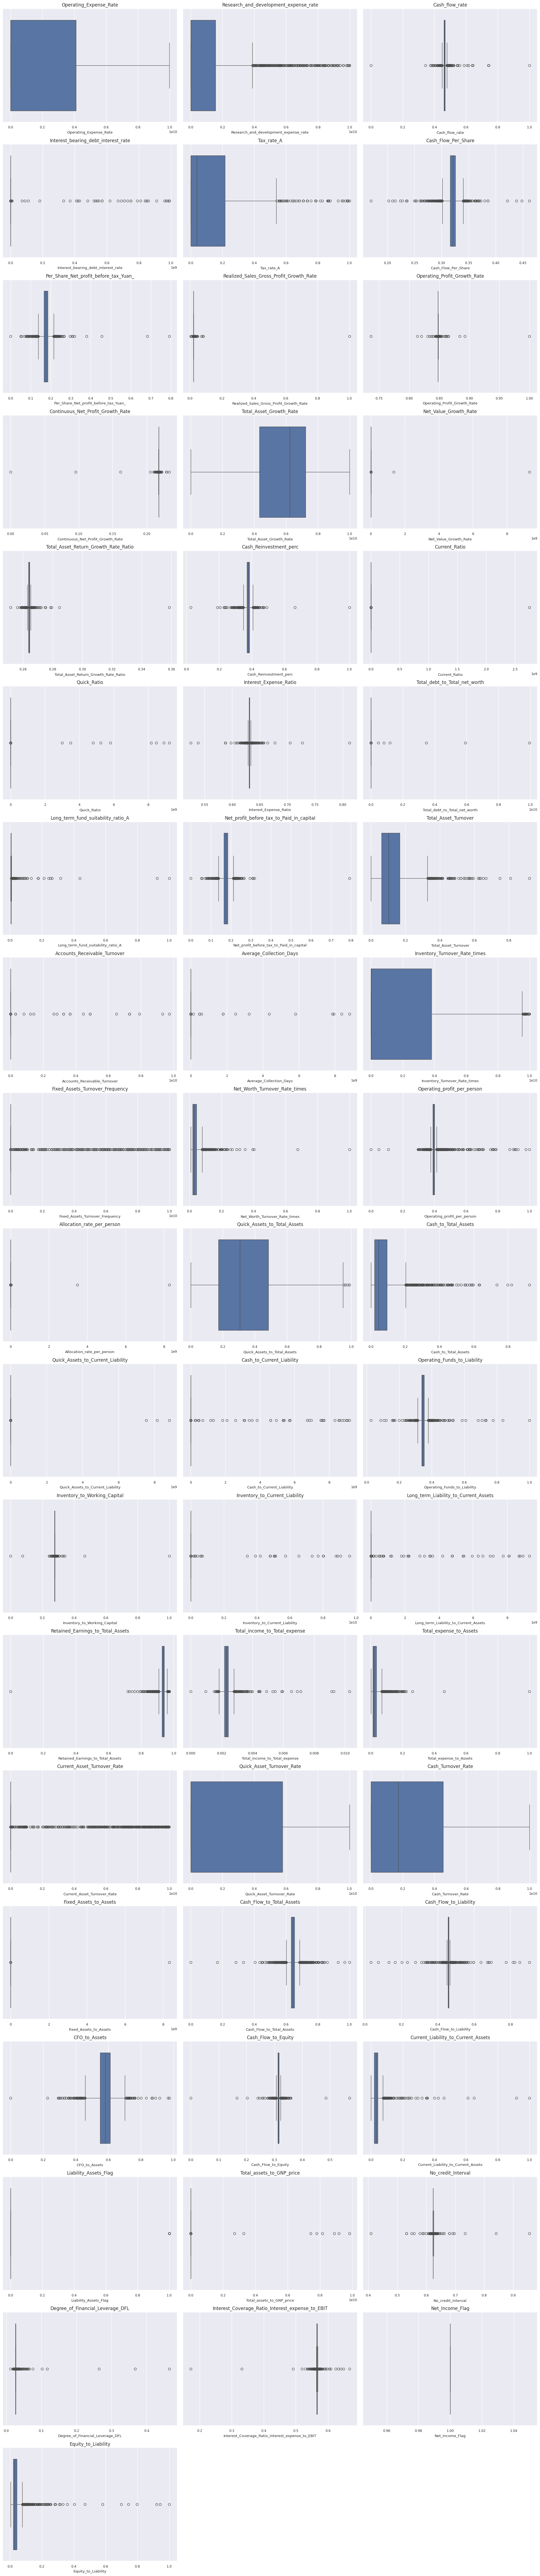

In [15]:
# Use boxplot to identify outliers
plot_outlier_check(dfc_treated,'Default')

**Observations:**
* Boxplots reveal substantial outliers.

#### Treat Outliers

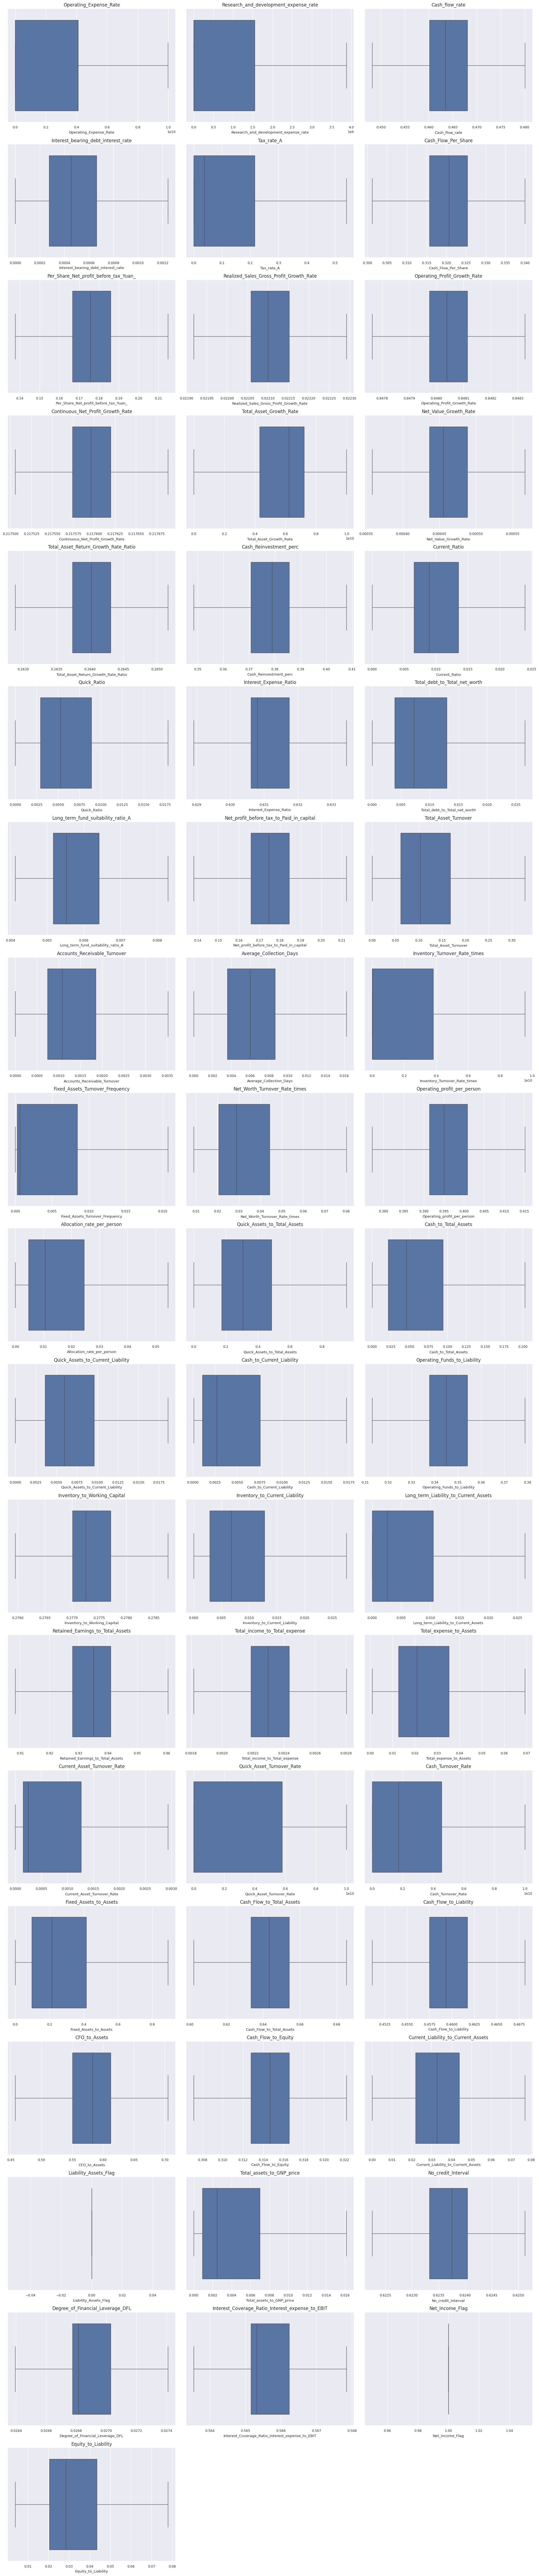

In [16]:
# Call function to treat outliers for each column, replace upper outliers with upper_bound value and lower outliers with lower bound
dfc_treated = treat_outliers(dfc_treated, 'Default')

# Check for Outliers again
plot_outlier_check(dfc_treated,'Default')

* Upper and Lower Outliers were treated with Upper and Lower Bound values respectively.

# <a name='eda'>Exploratory Data Analysis (EDA)</a>
* Functions to help in EDA
* Univariate Analysis for Top 10 Numerical Columns (Correlated to Target Variable)
* Univariate Analysis of Target Variable
* Bivariate Analysis - Relation with Target Variable
* EDA Summary and Key Insights

### Function to help EDA

In [17]:
# Plots boxplots and histograms for numerical features of a DataFrame.
def plot_numerical(dataframe):
    # Extract numerical variables
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    num_vars = len(numeric_columns)

    # Calculate the number of rows for the subplot
    num_rows = (num_vars // 3) + (1 if num_vars % 3 != 0 else 0)

    # Set up the matplotlib figure
    fig, axes = plt.subplots(2 * num_rows, 3, figsize=(20, 5 * num_rows * 1.25), constrained_layout=True, gridspec_kw={'height_ratios': [1, 4] * num_rows})

    # Loop through the numerical variables to create boxplots and histograms
    for i, column in enumerate(numeric_columns):
        # Define the row and column index in the subplot grid
        row = (i // 3) * 2
        col = i % 3

        # Create a boxplot for the variable
        sns.boxplot(data=dataframe, x=column, ax=axes[row, col])
        axes[row, col].set_title(f'Box Plot and Histogram for {column}', fontsize=12)
        axes[row, col].tick_params(labelbottom=False)  # Remove x-ticks for the boxplot
        axes[row, col].set_xlabel('')  # Remove x-axis label for the boxplot

        # Create a histogram for the variable
        sns.histplot(data=dataframe, x=column, kde=True, ax=axes[row + 1, col], binwidth=None)
        axes[row + 1, col].set_title('')  # Remove title for the histogram
        axes[row + 1, col].set_xlabel(f'{column}\n\n')  # Set x-axis label for the histogram

    # Remove the excess axes
    i += 1
    delrow =  (i // 3) * 2
    delcol = i % 3
    fig.delaxes(axes[delrow, delcol])
    fig.delaxes(axes[delrow, delcol + 1])
    fig.delaxes(axes[delrow + 1, delcol])
    fig.delaxes(axes[delrow + 1, delcol + 1])

    plt.show()

# Use Top 10 correlated features to target column (Default), evaluate each with the target column
def plot_boxplots(features_df, target_series):
    """
    Parameters:
    - features_df: pandas DataFrame containing the numerical features
    - target_series: pandas Series containing the target variable
    """
    # Get column names of the features
    numeric_cols = features_df.columns

    # Number of numerical features
    num_features = len(numeric_cols)
    num_rows = (num_features + 3) // 3  # Calculate the number of rows needed for subplots

    # Set the figure size based on the number of rows
    plt.figure(figsize=(20, 5 * num_rows))

    # Loop through each numerical column and create a boxplot against the target variable
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(num_rows, 3, i)
        sns.boxplot(x=target_series, y=features_df[col])
        plt.title(f'{col} vs Default (Target)', fontsize=12)

    plt.tight_layout()
    plt.show()


### Univariate Analysis for Top 10 Numerical Columns Correlated with Target Variable (Default)

Top 10 Correlated Features to Target Variable:



,Default
Retained_Earnings_to_Total_Assets,0.427221
Net_profit_before_tax_to_Paid_in_capital,0.417038
Per_Share_Net_profit_before_tax_Yuan_,0.414582
Total_income_to_Total_expense,0.365671
Net_Value_Growth_Rate,0.359598
Total_debt_to_Total_net_worth,0.343892
Current_Liability_to_Current_Assets,0.309257
Operating_profit_per_person,0.284418
Equity_to_Liability,0.249754
Current_Ratio,0.234968


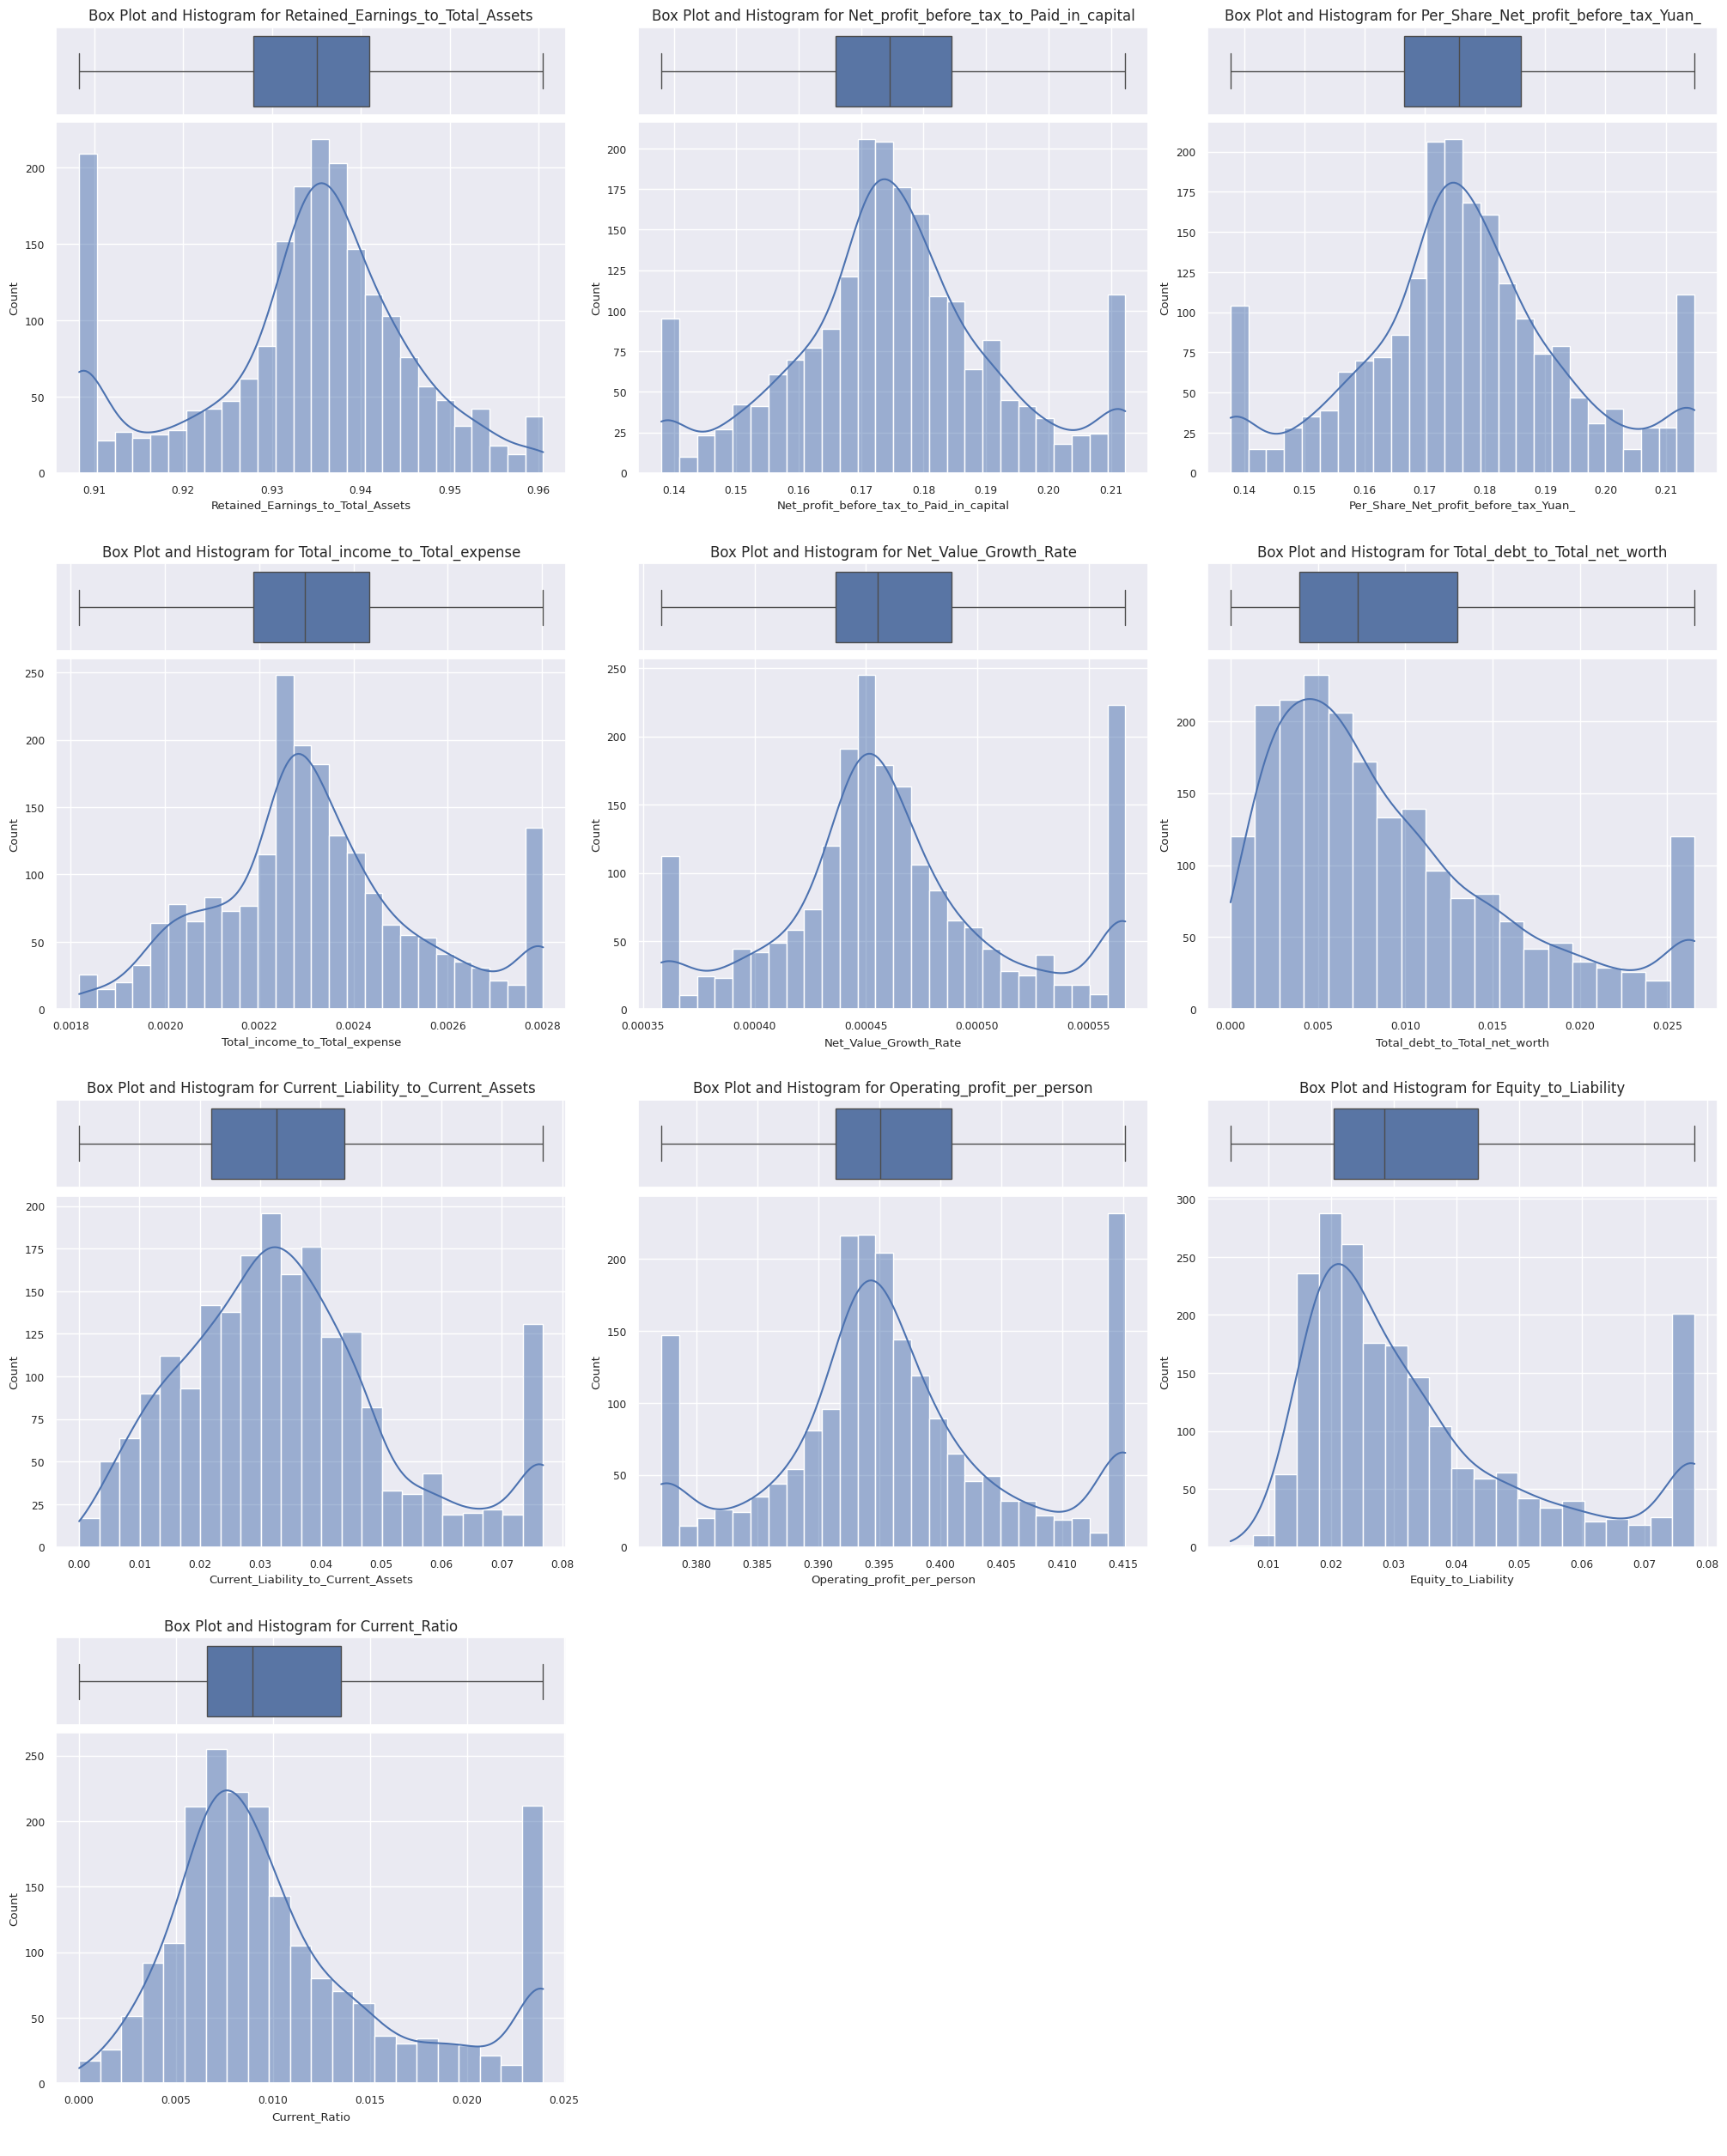

In [18]:
# Univariate Analysis for top 10 correlated features of the treated dataset

# Calculate the correlation matrix
correlation_matrix = dfc_treated.corr()

# Get the correlation of numerical columns with the target 'Default'
correlation_with_target = correlation_matrix['Default'].abs().sort_values(ascending=False)

# Focus on the top correlated features (e.g., top 10)
top_correlated_features = correlation_with_target[1:11]  # Exclude 'Default' itself

# Display the top correlated features
print('Top 10 Correlated Features to Target Variable:\n')
display(top_correlated_features)

# Plot histograms for the top correlated features
important_numeric_cols = top_correlated_features.index
plot_numerical(dfc_treated[important_numeric_cols])

**Observations from the top 10 correlated numerical features:**

1. **Retained_Earnings_to_Total_Assets**:
   - **Mean**: 0.9334, with a small standard deviation of 0.0124, indicating that most companies have a high proportion of retained earnings relative to total assets.
   - **Range**: The values are tightly clustered between 0.91 and 0.96, suggesting that this ratio might be a strong differentiator for predicting defaults.

2. **Net_profit_before_tax_to_Paid_in_capital**:
   - **Mean**: 0.1752, with a moderate spread (std: 0.0172).
   - **Insight**: This feature shows that companies generally have positive net profits relative to their paid-in capital, but variations among companies could be significant.

3. **Per_Share_Net_profit_before_tax_Yuan_**:
   - **Mean**: 0.1764, closely aligned with **Net_profit_before_tax_to_Paid_in_capital**.
   - **Insight**: Slight variations in profitability per share could be a potential indicator of financial stability, but the relatively narrow range suggests limited differences between most companies.

4. **Total_income_to_Total_expense**:
   - **Mean**: 0.0023, indicating that income barely exceeds expenses for many companies.
   - **Insight**: This could be a critical feature, as companies operating on thin margins may be more prone to default. Outliers at the higher end could indicate more robust companies.

5. **Net_Value_Growth_Rate**:
   - **Mean**: 0.000463, with very small variations.
   - **Insight**: This low rate suggests that most companies have modest growth in their net value, and deviations from this could be important in distinguishing high-risk companies.

6. **Total_debt_to_Total_net_worth**:
   - **Mean**: 0.00933, with a **wide standard deviation** (0.0070).
   - **Insight**: This is a key indicator for predicting defaults, as companies with higher debt relative to net worth are at a higher risk. The range (0 to 0.02656) suggests significant variation across companies.

7. **Current_Liability_to_Current_Assets**:
   - **Mean**: 0.0347, but with a large standard deviation (0.0180).
   - **Insight**: The ratio of liabilities to assets can highlight liquidity issues. Companies with high liabilities relative to assets may struggle to meet short-term obligations, increasing their default risk.

8. **Operating_profit_per_person**:
   - **Mean**: 0.3962, with minimal variation (std: 0.0100).
   - **Insight**: Operating profit per employee could indicate operational efficiency. However, since most values are close to the mean, this may not be the strongest predictor of default.

9. **Equity_to_Liability**:
   - **Mean**: 0.0350, with significant variation (std: 0.0194).
   - **Insight**: This ratio is critical in determining the leverage of a company. Companies with lower equity relative to liabilities are at higher risk, making this a potentially important feature.

10. **Current_Ratio**:
   - **Mean**: 0.0107, with a significant range (0 to 0.0239).
   - **Insight**: This ratio, which compares current assets to current liabilities, is another key indicator of short-term liquidity. Companies with low current ratios may face liquidity crises, which can lead to defaults.

**Key Takeaways:**
- **Debt-related metrics** (e.g., **Total_debt_to_Total_net_worth**, **Current_Liability_to_Current_Assets**, and **Equity_to_Liability**) are crucial for identifying companies at risk of default. High variability in these features highlights significant differences in financial health across companies.
- **Profitability and growth-related metrics** (e.g., **Net_profit_before_tax_to_Paid_in_capital** and **Net_Value_Growth_Rate**) also provide useful insights, but their narrower range suggests limited distinction between companies.
- **Liquidity and efficiency** ratios like **Current_Ratio** and **Operating_profit_per_person** further help identify financial robustness.

These features provide valuable insights into a company's financial health, which can be useful for both model building and understanding risk factors for default.

### Univariate Analysis of Target Variable (Default)

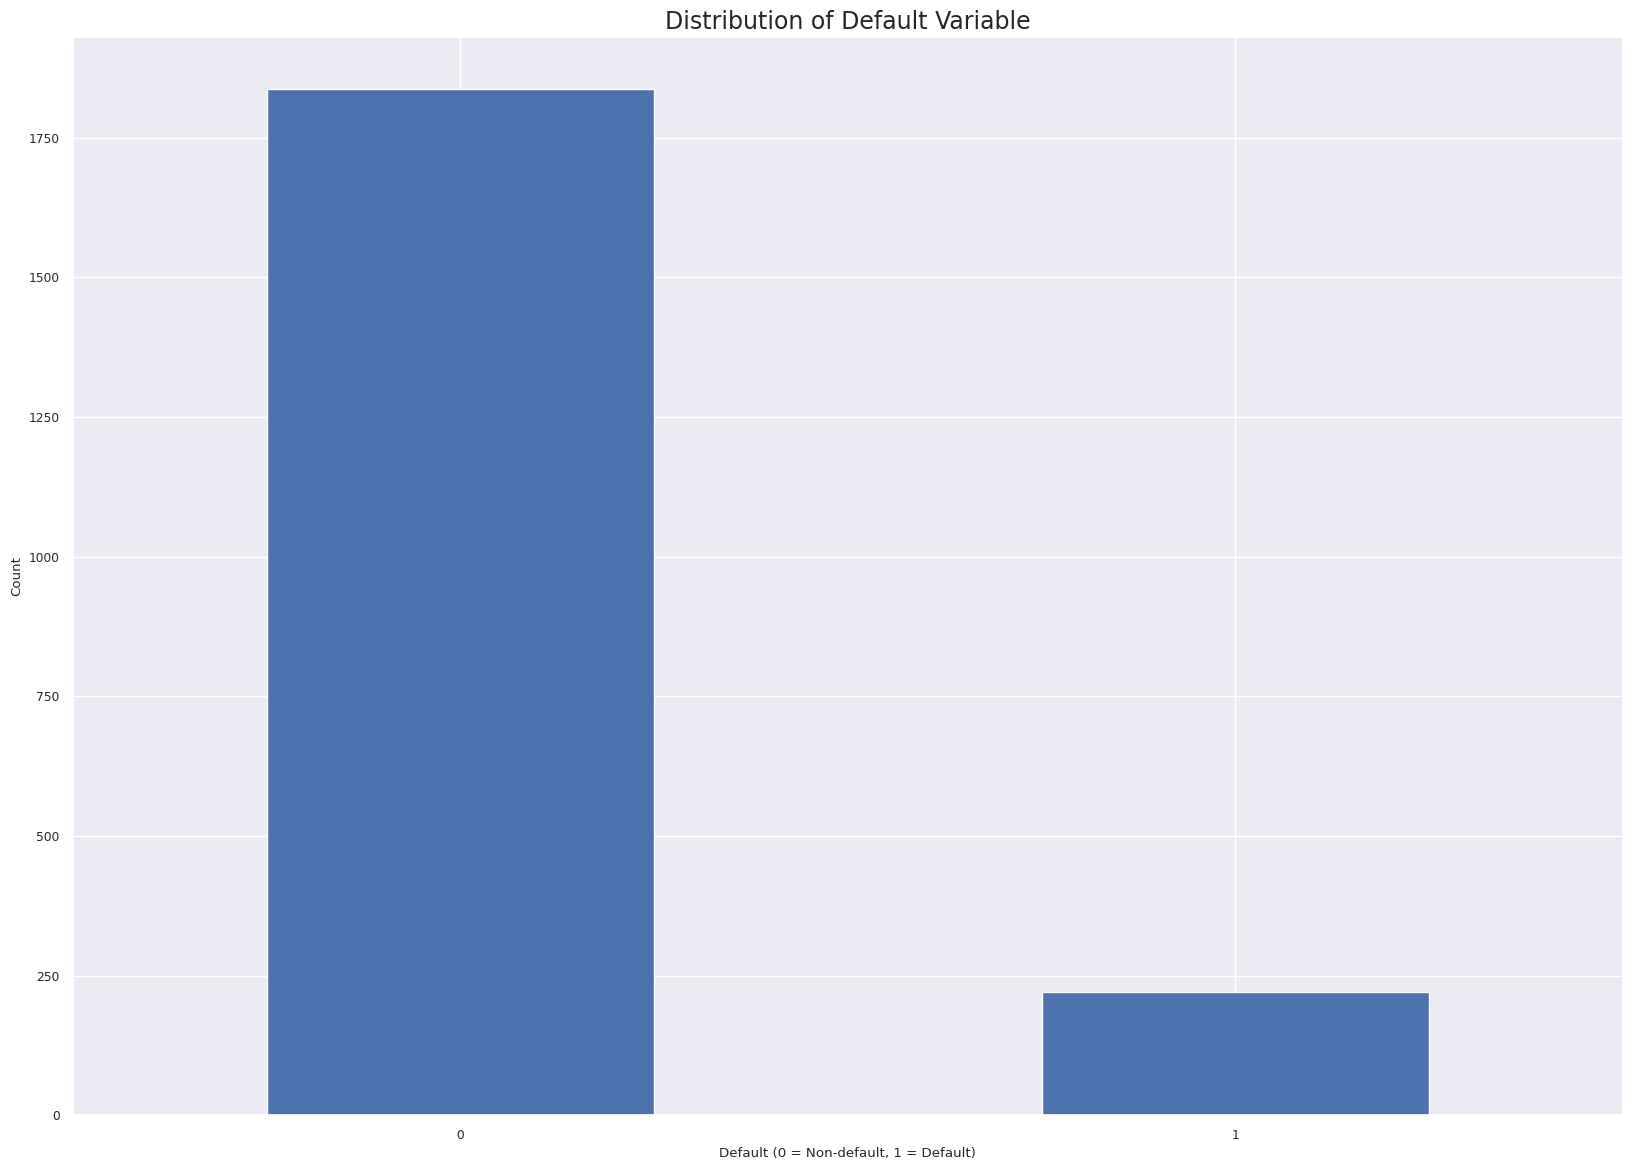

Default
0    89.31001
1    10.68999
Name: proportion, dtype: float64


In [19]:
# Univariate analysis for the 'Default' variable
#plt.figure(figsize=(6, 4))
dfc_treated['Default'].value_counts().plot(kind='bar')
plt.title('Distribution of Default Variable', fontsize=17)
plt.xlabel('Default (0 = Non-default, 1 = Default)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the distribution in percentages
default_distribution = dfc_treated['Default'].value_counts(normalize=True) * 100
print(default_distribution)


**Observations:**
* **Class Distribution:** The bar chart reveals the distribution of companies that have defaulted (Default = 1) is 11% compared to those that have not defaulted (Default = 0) with 89%.
* **Imbalance Data:** The dataset is heavily imbalanced and may need to be addressed using techniques like **SMOTE** (Synthetic Minority Over-sampling Technique) or undersampling



### Bivariate Analysis - Relation with Target Variable (Default)

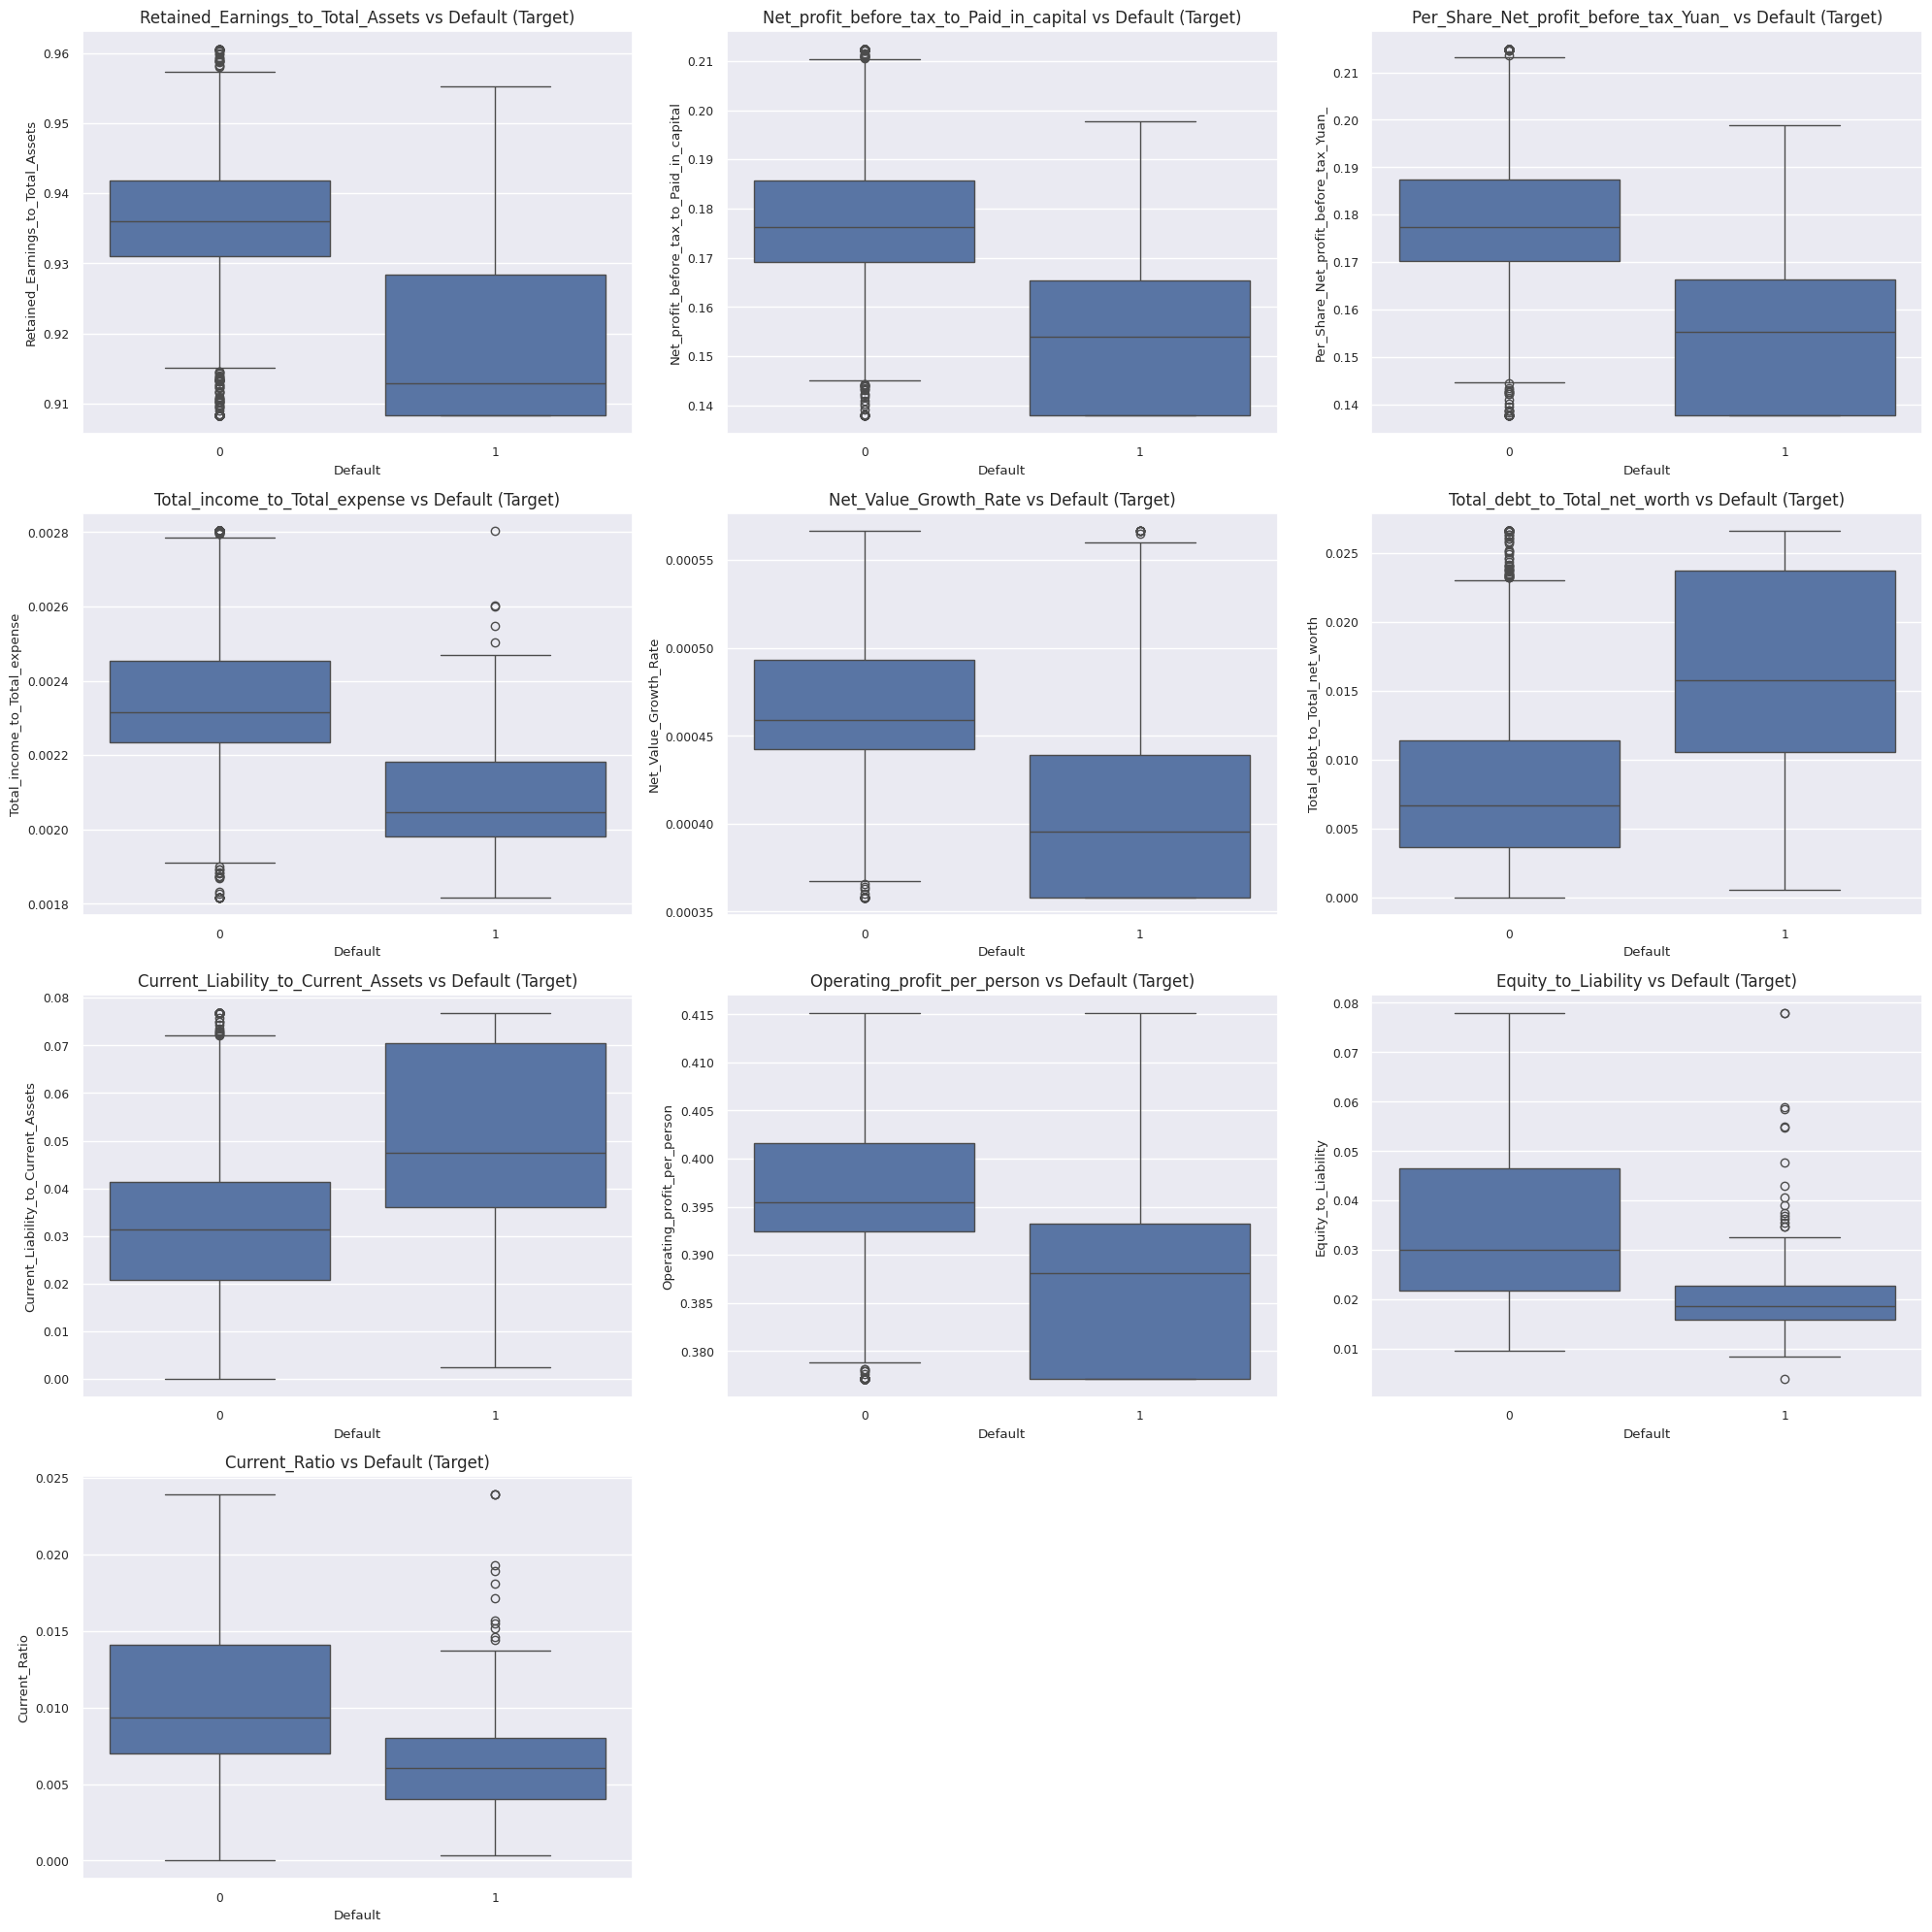

In [20]:
# Display boxplots to show relation between target variables (Default) and of top 10 features correlated to target variable.
plot_boxplots(dfc_treated[important_numeric_cols],dfc_treated['Default'])

**Observations:**
* **Retained_Earnings_to_Total_Assets**:
   - **Distribution**: The boxplot shows that companies with lower values of retained earnings relative to total assets are more likely to default. Non-defaulting companies tend to have a higher ratio, indicating financial stability and retained profits that buffer against default.
   - **Insight**: A higher ratio of retained earnings signals better financial health, reducing the likelihood of default.

* **Net_profit_before_tax_to_Paid_in_capital**:
   - **Distribution**: Companies that did not default generally exhibit higher ratios of net profit before tax relative to paid-in capital. In contrast, defaulting companies have a more compressed distribution, often lower.
   - **Insight**: Profitability relative to capital invested is a strong indicator of a company’s ability to service debts and avoid default.

* **Per_Share_Net_profit_before_tax_Yuan_**:
   - **Distribution**: Non-defaulting companies have a wider and higher spread for this metric, whereas defaulting companies show lower values. This indicates that higher per-share profit helps companies maintain financial stability.
   - **Insight**: Companies with higher profitability per share are less prone to default, reinforcing the idea that profitability is a key factor in financial resilience.

* **Total_income_to_Total_expense**:
   - **Distribution**: The ratio of total income to total expense is slightly higher for non-defaulting companies. Defaulting companies are closer to breaking even, with income barely exceeding expenses or sometimes lower.
   - **Insight**: A tight margin between income and expense leaves companies vulnerable to financial distress, leading to defaults.

* **Net_Value_Growth_Rate**:
   - **Distribution**: Non-defaulting companies show a slightly higher growth rate, although the difference is marginal. Companies with a higher growth rate in net value appear better positioned to handle their debt obligations.
   - **Insight**: Slow or negative growth in net value correlates with a higher probability of default, though the effect is less pronounced compared to other features.

* **Total_debt_to_Total_net_worth**:
   - **Distribution**: This metric shows one of the strongest differentiations. Defaulting companies typically have a much higher debt-to-net-worth ratio, indicating over-leverage and a higher risk of default.
   - **Insight**: Companies with excessive debt relative to their net worth are significantly more likely to default, making this a critical predictor.

* **Current_Liability_to_Current_Assets**:
   - **Distribution**: Companies that default have a higher ratio of current liabilities to current assets, indicating liquidity issues. Non-defaulting companies generally maintain lower ratios, suggesting better liquidity management.
   - **Insight**: Poor liquidity (higher liabilities compared to assets) is a strong indicator of a company's inability to meet short-term obligations, leading to default.

* **Operating_profit_per_person**:
   - **Distribution**: While the difference between defaulting and non-defaulting companies is less significant, non-defaulting companies generally have slightly higher operating profit per person.
   - **Insight**: Operational efficiency may play a secondary role in predicting default, but it's not as strong an indicator as debt-related metrics.

* **Equity_to_Liability**:
   - **Distribution**: Defaulting companies tend to have much lower equity relative to liabilities, suggesting over-reliance on debt. Non-defaulting companies maintain a higher equity buffer.
   - **Insight**: A low equity-to-liability ratio signals financial vulnerability, with companies being more dependent on external borrowing and at a higher risk of default.

* **Current_Ratio**:
    - **Distribution**: Non-defaulting companies generally have a higher current ratio, indicating their ability to cover short-term liabilities with current assets. Defaulting companies, on the other hand, have lower current ratios, reflecting liquidity constraints.
    - **Insight**: A higher current ratio indicates better liquidity and a lower likelihood of default, as companies are more capable of meeting short-term obligations.

**Key Takeaways:**
* **Debt-Related Metrics**: Features like **Total_debt_to_Total_net_worth** and **Current_Liability_to_Current_Assets** show strong differentiation between defaulting and non-defaulting companies. High leverage and poor liquidity are major risk factors for default.
* **Profitability**: Metrics like **Net_profit_before_tax_to_Paid_in_capital** and **Per_Share_Net_profit_before_tax_Yuan_** indicate that higher profitability is associated with financial stability and a lower chance of default.
* **Liquidity**: The **Current_Ratio** and **Equity_to_Liability** are key indicators, with higher values corresponding to better financial health and lower risk of default.

Overall, debt and liquidity-related metrics show the strongest relationship with the likelihood of default, while profitability plays a crucial, though somewhat secondary, role in predicting financial distress.

### EDA Summary and Key Insights

**Univariate Analysis**:
   - Most financial metrics exhibit **moderate variance**, with some features showing right-skewed distributions, such as **debt-to-assets ratios** and **current liabilities**.
   - Features like **retained earnings**, **net profit margins**, and **liquidity ratios** generally indicate that the majority of companies are financially stable, though some outliers indicate higher risk.

**Bivariate Analysis**:
   - **Debt-related metrics** (e.g., **Total_debt_to_Total_net_worth**, **Liabilities_to_Assets**) show a strong distinction between defaulting and non-defaulting companies, with higher debt levels linked to a higher likelihood of default.
   - **Profitability ratios** (e.g., **Net_profit_before_tax_to_Paid_in_capital**) reveal that companies with lower profitability are more prone to default.
   - **Liquidity metrics** (e.g., **Current_Liability_to_Current_Assets**) highlight that companies struggling with liquidity are at a higher risk of default.

**Target Column (Default) Distribution**:
   - The **target variable** (`Default`) shows an **imbalanced distribution**, with a larger proportion of non-defaulting companies compared to defaulting ones. This may necessitate balancing techniques during model building to avoid bias.

#### Key Insights:
- **Debt and liquidity** metrics are the strongest predictors of default risk, with companies carrying high debt and poor liquidity being significantly more likely to default.
- **Profitability** also plays a crucial role, but its predictive power is secondary to debt and liquidity.
- Addressing the **class imbalance** in the target variable will be important to ensure model robustness and fairness.

# <a name='dp'>Data Pre-processing</a>
* Separate Features and Target Variables
* Train Test Split
* Multicollinearity Check
* Scaling the Dataset

## Separate Features and Target Variables

In [21]:
# Creat dataframe X excluding Default, datafrane Y with Target Variable
# Create the Features and Target Dataset
X = dfc_treated.drop(columns='Default', axis=1)
y = dfc_treated['Default']
display(X.head())
display(y.head())

,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Cash_Reinvestment_perc,Current_Ratio,Quick_Ratio,Interest_Expense_Ratio,Total_debt_to_Total_net_worth,Long_term_fund_suitability_ratio_A,Net_profit_before_tax_to_Paid_in_capital,Total_Asset_Turnover,Accounts_Receivable_Turnover,Average_Collection_Days,Inventory_Turnover_Rate_times,Fixed_Assets_Turnover_Frequency,Net_Worth_Turnover_Rate_times,Operating_profit_per_person,Allocation_rate_per_person,Quick_Assets_to_Total_Assets,Cash_to_Total_Assets,Quick_Assets_to_Current_Liability,Cash_to_Current_Liability,Operating_Funds_to_Liability,Inventory_to_Working_Capital,Inventory_to_Current_Liability,Long_term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income_to_Total_expense,Total_expense_to_Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Cash_Turnover_Rate,Fixed_Assets_to_Assets,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.003519,0.000452,7.070000e+08,0.000305,0.029839,0.415152,0.054430,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0.0,0.016143,0.622251,0.026930,0.565744,1,0.015338
1,9.380000e+09,3.875000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021918,0.847763,0.217506,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628913,0.006812,0.005230,0.160682,0.056972,0.000306,0.016233,2.782020e-04,0.020716,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0.0,0.006191,0.622513,0.026395,0.563546,1,0.029445
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.301182,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.348860,0.008669,0.005912,0.631688,0.004105,0.005139,0.171548,0.154423,0.001045,0.006048,1.698640e-04,0.000149,0.029839,0.393263,0.012358,0.318921,0.008242,0.006090,0.000458,0.313048,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.644486,0.459700,0.463045,0.314777,0.033560,0.0,0.001095,0.623749,0.027276,0.566744,1,0.041718
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.022293,0.848326,0.217662,7.520000e+09,0.000448,0.264766,0.379876,0.017750,0.001738,0.632588,0.007846,0.008295,0.172159,0.101949,0.003519,0.001169,1.340000e+09,0.001827,0.028387,0.415152,0.009049,0.137092,0.053510,0.002437,0.002793,0.343500,0.277630,0.027542,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.656832,0.461860,0.577212,0.316974,0.016527,0.0,0.003749,0.622963,0.026988,0.565950,1,0.026956
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.389609,0.008427,0.003967,0.632682,0.013671,0.005822,0.175598,0.163418,0.000814,0.007776,1.341330e-04,0.000830,0.052258,0.392766,0.002069,0.739193,0.082328,0.007271,0.002376,0.345796,0.277235,0.003342,0.000000,0.934421,0.002310,0.010493,0.000208,1.892020e-04,5.670000e+09,0.103303,0.656549,0.461238,0.594038,0.317729,0.034497,0.0,0.006595,0

,Default
0,0
1,1
2,0
3,0
4,0


## Train Test Split

In [22]:
# create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)

# Print the train and test dataset and ensure the distribution of class in test data is identicatial to train target dataset
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (1378, 55)
Shape of test set :  (680, 55)
Percentage of classes in training set:
Default
0    0.893324
1    0.106676
Name: proportion, dtype: float64
Percentage of classes in test set:
Default
0    0.892647
1    0.107353
Name: proportion, dtype: float64


**Observations:**

* The dataset is split into training and test sets in a **67:33** ratio.
* The random_state parameter is set to 42.
* The **stratify=y** ensures consistent distribution of target variable between train and test sets.

## Multicollinearity Check

In [23]:
# Function to check for multicollinearity
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]

    # Sort the VIF values in descending order
    vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)

    return vif

In [24]:
# Check for Multicollinearity in Training Dataset
checking_vif(X_train)

,feature,VIF
0,Per_Share_Net_profit_before_tax_Yuan_,83.228095
1,Net_profit_before_tax_to_Paid_in_capital,82.794816
2,Cash_Flow_to_Total_Assets,66.058322
3,CFO_to_Assets,32.299629
4,Quick_Assets_to_Current_Liability,23.810866
5,Cash_Flow_to_Liability,22.739773
6,Operating_Funds_to_Liability,22.563591
7,Cash_Flow_to_Equity,22.240225
8,Cash_flow_rate,16.523339
9,Net_Worth_Turnover_Rate_times,16.406500


**Observations:**
* There are quite a few columns showing high VIF values, greater than 5, indicating multicollinearity among the features.
* We will eleminate column with maximum VIF, untill all columns are within the acceptable range of 5.

In [25]:
# Function to eliminate columns with high VIF
def treat_multicollinearity(df, threshold=5):
    """
    Parameters:
    - df: pandas DataFrame containing the features to be checked for multicollinearity
    - threshold: VIF threshold, default is 5
    Returns:
    - df: pandas DataFrame with reduced multicollinearity
    """
    while True:
        # Calculate VIF for the current dataframe
        vif = checking_vif(df)

        # Find the feature with the highest VIF value
        max_vif = vif["VIF"].max()

        # Break the loop if all VIF values are below the threshold
        if max_vif < threshold:
            break

        # Find the feature with the highest VIF and remove it
        feature_to_remove = vif.loc[vif["VIF"].idxmax(), "feature"]
        print(f"Removing feature '{feature_to_remove}' with VIF: {max_vif}")

        # Drop the feature from the dataframe
        df = df.drop(columns=[feature_to_remove])

    # Return the dataframe with reduced multicollinearity
    return df

In [26]:
# Treat Multicollinearity by dropping columns with high VIF (threshold = 5)
X_train =treat_multicollinearity(X_train)

Removing feature 'Per_Share_Net_profit_before_tax_Yuan_' with VIF: 83.22809466675108
Removing feature 'Cash_Flow_to_Total_Assets' with VIF: 66.03122822275698
Removing feature 'CFO_to_Assets' with VIF: 32.10901086559086
Removing feature 'Quick_Assets_to_Current_Liability' with VIF: 23.777991715154883
Removing feature 'Operating_Funds_to_Liability' with VIF: 18.94608144934635
Removing feature 'Net_Worth_Turnover_Rate_times' with VIF: 15.958999108386413
Removing feature 'Current_Ratio' with VIF: 13.197573187697344
Removing feature 'Net_profit_before_tax_to_Paid_in_capital' with VIF: 7.837478850193706
Removing feature 'Interest_Coverage_Ratio_Interest_expense_to_EBIT' with VIF: 6.39727878068583
Removing feature 'Cash_Reinvestment_perc' with VIF: 6.249952454168627
Removing feature 'Quick_Ratio' with VIF: 5.820388649261178
Removing feature 'Cash_Flow_to_Equity' with VIF: 5.435972466974049


In [27]:
# Verify no columns show multicollinearity after treatment
checking_vif(X_train)

,feature,VIF
0,Quick_Assets_to_Total_Assets,4.975127
1,Fixed_Assets_to_Assets,4.817482
2,Total_income_to_Total_expense,4.237309
3,Current_Liability_to_Current_Assets,4.185876
4,Equity_to_Liability,4.077838
5,Operating_Profit_Growth_Rate,3.758250
6,Retained_Earnings_to_Total_Assets,3.721979
7,Continuous_Net_Profit_Growth_Rate,3.560356
8,Cash_to_Current_Liability,3.515830
9,Total_Asset_Turnover,3.437522


In [28]:
# Dropping Columns that do not assist in prediction
X_train.drop(columns=['Liability_Assets_Flag', 'Net_Income_Flag'], inplace=True)

In [29]:
# Ensurinf X_test contains only retained columns after muticollinearity test
X_test = X_test[X_train.columns]

display(X_train.head())
display(X_test.head())

,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Interest_Expense_Ratio,Total_debt_to_Total_net_worth,Long_term_fund_suitability_ratio_A,Total_Asset_Turnover,Accounts_Receivable_Turnover,Average_Collection_Days,Inventory_Turnover_Rate_times,Fixed_Assets_Turnover_Frequency,Operating_profit_per_person,Allocation_rate_per_person,Quick_Assets_to_Total_Assets,Cash_to_Total_Assets,Cash_to_Current_Liability,Inventory_to_Working_Capital,Inventory_to_Current_Liability,Long_term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income_to_Total_expense,Total_expense_to_Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Cash_Turnover_Rate,Fixed_Assets_to_Assets,Cash_Flow_to_Liability,Current_Liability_to_Current_Assets,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Equity_to_Liability
2011,1.800460e-04,0.000000e+00,0.480024,0.000997,0.000000,0.336387,0.022038,0.847988,0.217506,4.360000e+09,0.000387,0.262952,0.630372,0.004988,0.007997,0.080960,0.003519,0.000874,1.280000e+09,0.000848,0.377127,0.017907,0.110471,0.044337,0.002267,0.277692,0.027542,0.000801,0.913445,0.002009,0.044356,0.000362,4.200000e+09,5.030000e+08,0.057933,0.459422,0.018827,0.001359,0.623409,0.026761,0.036286
697,1.123990e-04,1.750000e+09,0.466326,0.000242,0.315619,0.320648,0.022065,0.847995,0.217583,5.620000e+09,0.000454,0.263754,0.630689,0.006476,0.005244,0.169415,0.000615,0.010298,8.450000e+09,0.000380,0.399686,0.013744,0.427696,0.102245,0.004606,0.277414,0.009614,0.000000,0.951647,0.002369,0.023272,0.000136,9.210000e+09,6.190000e+09,0.315321,0.453329,0.028661,0.001915,0.623787,0.026808,0.030424
160,2.010920e-04,0.000000e+00,0.459057,0.000701,0.000000,0.314848,0.022008,0.847921,0.217528,6.680000e+09,0.000428,0.263893,0.633442,0.010595,0.005310,0.041979,0.001244,0.005088,8.290000e+07,0.020716,0.391997,0.025326,0.172893,0.056881,0.005232,0.277673,0.004730,0.013117,0.932168,0.002249,0.019136,0.000216,1.734270e-04,1.494890e-04,0.267188,0.462268,0.039914,0.013423,0.623656,0.027410,0.022672
1273,5.960000e+09,2.870000e+09,0.462547,0.000274,0.000000,0.320860,0.022056,0.847960,0.217535,5.480000e+09,0.000497,0.263675,0.629459,0.011679,0.006928,0.327586,0.000828,0.007631,2.902400e-04,0.002714,0.395446,0.003978,0.813816,0.089053,0.002758,0.277114,0.002516,0.000000,0.931597,0.002200,0.032866,0.002934,8.590000e+09,2.680000e+09,0.056569,0.451086,0.030855,0.009573,0.624043,0.026507,0.021530
541,1.448930e-04,6.620000e+08,0.460562,0.000567,0.000000,0.316333,0.022036,0.847894,0.217506,6.740000e+09,0.000426,0.263506,0.628913,0.008059,0.005240,0.101949,0.000913,0.006933,5.160000e+09,0.000163,0.390810,0.017968,0.206314,0.004426,0.000224,0.278314,0.010363,0.002418,0.929592,0.002163,0.027028,0.000164,8.040000e+09,4.830000e+08,0.305976,0.459059,0.038939,0.007222,0.623365,0.026395,0.026523


,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Interest_Expense_Ratio,Total_debt_to_Total_net_worth,Long_term_fund_suitability_ratio_A,Total_Asset_Turnover,Accounts_Receivable_Turnover,Average_Collection_Days,Inventory_Turnover_Rate_times,Fixed_Assets_Turnover_Frequency,Operating_profit_per_person,Allocation_rate_per_person,Quick_Assets_to_Total_Assets,Cash_to_Total_Assets,Cash_to_Current_Liability,Inventory_to_Working_Capital,Inventory_to_Current_Liability,Long_term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income_to_Total_expense,Total_expense_to_Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Cash_Turnover_Rate,Fixed_Assets_to_Assets,Cash_Flow_to_Liability,Current_Liability_to_Current_Assets,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Equity_to_Liability
974,1.255810e-04,1.190000e+09,0.474086,0.000912,0.262577,0.334901,0.022210,0.848165,0.217622,8.120000e+09,0.000482,0.264384,0.631208,0.006133,0.005182,0.229385,0.002396,0.002639,1.089120e-04,0.000294,0.397741,0.007062,0.291262,0.156516,0.010136,0.277434,0.012320,0.005331,0.942026,0.002366,0.036288,0.002934,5.020000e+09,8.120000e+09,0.415291,0.467767,0.026236,0.000604,0.623764,0.026939,0.031529
134,1.358730e-04,0.000000e+00,0.457239,0.000331,0.012856,0.302221,0.022082,0.848011,0.217607,8.270000e+09,0.000484,0.264365,0.631391,0.012923,0.006400,0.044978,0.001982,0.003190,6.110000e+08,0.000358,0.415152,0.028165,0.135405,0.061648,0.001870,0.278280,0.019877,0.000622,0.939781,0.002786,0.006799,0.000842,1.361370e-04,1.629110e-04,0.072911,0.461328,0.032731,0.002274,0.622251,0.026837,0.020454
1267,2.985730e-04,1.039090e-04,0.461807,0.000000,0.000000,0.317642,0.022058,0.847763,0.217593,5.930000e+08,0.000436,0.264140,0.630612,0.001273,0.005178,0.104948,0.001242,0.005096,9.250000e+09,0.000104,0.390979,0.008303,0.281631,0.089100,0.013425,0.277177,0.015310,0.000000,0.927250,0.002188,0.037637,0.000133,1.015400e-04,8.870000e+09,0.538223,0.451086,0.014191,0.000249,0.623874,0.026791,0.077970
464,5.256840e-04,0.000000e+00,0.480024,0.000763,0.291224,0.331754,0.022084,0.848021,0.217583,7.260000e+09,0.000481,0.263374,0.630706,0.002090,0.005317,0.196402,0.003519,0.000203,1.261846e-03,0.000219,0.399086,0.005199,0.165366,0.066462,0.006723,0.278764,0.000630,0.004746,0.947134,0.002284,0.069197,0.002934,2.920000e+09,3.870000e+09,0.396187,0.463084,0.048119,0.003787,0.623738,0.026812,0.070224
579,3.930000e+09,0.000000e+00,0.461549,0.000000,0.295273,0.317854,0.022058,0.847972,0.217600,6.550000e+09,0.000452,0.264016,0.630616,0.006088,0.005647,0.200900,0.001154,0.005476,1.268720e-04,0.000564,0.393851,0.009722,0.576712,0.073497,0.003526,0.277194,0.006864,0.000000,0.937579,0.002382,0.008746,0.000134,1.130280e-04,4.000000e+09,0.183376,0.461933,0.024337,0.001320,0.624398,0.026792,0.031683


**Observations and Conclusion:**

* After treating for multicollinearity, all remaining columns show a **VIF below 5**, indicating that **multicollinearity has been successfully addressed**.
* The column **`Net_Income_Flag`** has a **VIF of 0**, suggesting that it provides no additional predictive value (likely due to being constant or redundant). Therefore, it has been **dropped** from the dataset.
* The column **`Liability_Assets_Flag`** shows a **VIF of NaN**, which indicates it is not contributing meaningfully to the model and has **no significance** for prediction. Consequently, this column has also been **dropped**.

## Scaling the Dataset

In [30]:
# Scale the predictor variables
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit the scaler on X_train and transform X_train
X_train_scaled[X_train_scaled.columns] = scaler.fit_transform(X_train[X_train_scaled.columns])

# Apply the same scaler to X_test
X_test_scaled[X_test_scaled.columns] = scaler.transform(X_test[X_test_scaled.columns])

# <a name='mb'>Model Building</a>
* Functions to assist in Performance Evaluation
* <a href = #lr>Logistic Regression Model</a>
* <a href = #lro>Logistic Regression Model using Optimal Threshold Cut-off</a>
* <a href = #smote>Balancing Data using SMOTE</a>
* <a href = #lros>Logistic Regression Model on Balanced Dataset using Optimal Threshold Cut-off</a>
* <a href = #rfo>Random Forest Model using Original Dataset</a>
* <a href = #rfs>Random Forest Model using Balanced Dataset</a>
* <a href = #rfst>Tuned Random Forest Model using Balanced Dataset</a>
* <a href = #lda>Linear Discriminant Analysis Model using Balanced Dataset</a>

## Functions to assist in Performance Evaluation

In [31]:
def model_performance_classification(model, predictors, target, modelname, threshold=0.5):
    """
    model: classifier (from statsmodels)
    predictors: independent variables
    target: dependent variable
    modelname: name of the model, which will be used as the index in the DataFrame
    threshold: threshold for classifying the observation as class 1
    """
    # Get predicted probabilities from statsmodels (no need for predict_proba in statsmodels)
    pred_prob = model.predict(predictors)  # Predict probabilities directly

    # Apply the threshold to get binary predictions
    pred = (pred_prob >= threshold).astype(int)

    # Calculate performance metrics
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score
    roc = roc_auc_score(target, pred_prob)  # Use predicted probabilities for ROC-AUC

    # Creating a dataframe of metrics with modelname as the index
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "ROC_AUC": roc
        },
        index=[modelname]
    )

    return df_perf

# Function to plot the confusion matrix with percentages
def confusion_matrix_plot(model, predictors, target, threshold=0.5):
    """
    model: classifier (from statsmodels)
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # Get predicted probabilities directly from statsmodels
    y_pred_prob = model.predict(predictors)  # Predict probabilities directly

    # Apply the threshold to get binary predictions
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Generate confusion matrix
    cm = confusion_matrix(target, y_pred)

    # Generate labels for each cell with counts and percentages
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", cbar=False)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(f"Confusion Matrix (Threshold = {threshold})")
    plt.show()

def plot_roc_curve(model, predictors, target):
    """
    Plots the ROC curve for a given model and dataset.

    Parameters:
    - model: Trained model (logistic regression, random forest, etc.)
    - predictors: Independent variables (X_test, X_train, etc.)
    - target: True values for the dependent variable (y_test, y_train, etc.)
    """
    # Get predicted probabilities from the model
    y_prob_pred = model.predict(predictors)

    # Calculate ROC curve and AUC score
    fpr, tpr, thresholds = roc_curve(target, y_prob_pred)
    auc = roc_auc_score(target, y_prob_pred)

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue', lw=2)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2)  # Diagonal line

    # Formatting the plot
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)', fontsize=12)
    plt.ylabel('True Positive Rate (TPR)', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
    plt.legend(loc="lower right")
    plt.grid(True)

    # Display the plot
    plt.show()

def find_optimum_cutoff(model, predictors, targets):
    """
    Find the optimal threshold for a given model and dataset based on F1 Score.

    Parameters:
    - model: Trained model (logistic regression, random forest, etc.)
    - predictors: Independent variables (X_test, X_train, etc.)
    - targets: True values for the dependent variable (y_test, y_train, etc.)

    Returns:
    - best_threshold: The threshold with the highest F1 Score
    - results_df: A DataFrame containing the performance metrics for different thresholds
    """
    # Generate predicted probabilities from the model
    y_prob_pred = model.predict(predictors)

    # Define threshold values to test
    thresholds = np.arange(0.1, 0.9, 0.1)

    # List to store performance results
    results = []

    for threshold in thresholds:
        # Convert probabilities to binary predictions based on the threshold
        y_pred = (y_prob_pred >= threshold).astype(int)

        # Calculate performance metrics
        accuracy = accuracy_score(targets, y_pred)
        precision = precision_score(targets, y_pred)
        recall = recall_score(targets, y_pred)
        f1 = f1_score(targets, y_pred)
        roc_auc = roc_auc_score(targets, y_prob_pred)

        # Store results for each threshold
        results.append({
            'Threshold': threshold,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC-AUC': roc_auc
        })

    # Convert results to a DataFrame for analysis
    results_df = pd.DataFrame(results)

    # Find the best threshold based on the highest F1 Score
    best_threshold = results_df.loc[results_df['F1 Score'].idxmax()]

    return best_threshold


## <a name='lr'>Logistic Regression Model using Statsmodel</a>

In [32]:
# Bringing together X and y as its required for the Statsmodel
dfc_train = pd.concat([X_train_scaled, y_train], axis = 1)
dfc_test = pd.concat([X_test_scaled, y_test], axis = 1)

# Build the formula for the logistic regression model
formula = 'Default ~ ' + ' + '.join(X_train_scaled.columns)

# Build the logistic regression model and view the summary
lr_model = SM.logit(formula=formula, data=dfc_train).fit()
print(lr_model.summary())

Optimization terminated successfully.
         Current function value: 0.183935
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1336
Method:                           MLE   Df Model:                           41
Date:                Wed, 11 Sep 2024   Pseudo R-squ.:                  0.4582
Time:                        13:30:46   Log-Likelihood:                -253.46
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 4.590e-66
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  -4.0450

**Observations:**

Based on the **model summary** with several features having **p-values greater than 0.05**, here are a few key observations:

* **Statistical Insignificance**: Features with p-values greater than 0.05 are statistically insignificant, indicating they do not contribute meaningfully to predicting the target variable (`Default`). Retaining these features adds noise to the model without improving prediction accuracy.
   
* **Risk of Overfitting**: Including insignificant features increases the risk of overfitting. By removing these features, the model becomes more parsimonious, improving generalization to unseen data.

* **Model Simplification**: Removing features with p-values > 0.05 simplifies the model, making it more interpretable and computationally efficient, without sacrificing predictive power.

* **Improved Model Performance**: By focusing only on statistically significant features (p-value ≤ 0.05), we can reduce model complexity and potentially improve performance metrics like accuracy, precision, and recall.

**Next Step:**

To enhance model efficiency and predictive capability, it is advisable to remove the insignificant features and refit the model with only the significant ones.

### Function to remove insignificant features (**p-value > 0.05**)

In [33]:
# Iteratively remove insignificant features
def remove_insignificant_features(df_xt, df_yt, significance_level=0.05):
    while True:
        # Concatenate X_train and y_train for statsmodels formula
        dft = pd.concat([df_xt, df_yt], axis=1)

        # Create the formula for the logistic regression model
        formula = f'Default ~ {" + ".join(df_xt.columns)}'

        # Fit the model
        model = SM.logit(formula=formula, data=dft).fit(disp=False)

        # Get p-values from the model
        p_values = model.pvalues

        # Find features with p-values > significance level
        insignificant_features = p_values[p_values > significance_level].index.tolist()

        # Stop if there are no more insignificant features
        if len(insignificant_features) == 0 or 'const' in insignificant_features:
            break

        # Drop the insignificant features
        df_xt = df_xt.drop(columns=insignificant_features)

    return df_xt, model

### Logistic Regression Model Using Significant Features

In [34]:
# Use function to Remove insignificant features and build Final Logistic Regression model
X_train_significant, lr_final_model = remove_insignificant_features(X_train_scaled, y_train)

# Apply the same transformation to X_test
X_test_significant = X_test_scaled[X_train_significant.columns]

# Print the summary of the final model
print(lr_final_model.summary())

                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1365
Method:                           MLE   Df Model:                           12
Date:                Wed, 11 Sep 2024   Pseudo R-squ.:                  0.4335
Time:                        13:30:47   Log-Likelihood:                -265.04
converged:                       True   LL-Null:                       -467.84
Covariance Type:            nonrobust   LLR p-value:                 2.457e-79
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -3.7918      0.228    -16.598      0.000      -4.240      -3.344
Research_and_development_expense_rate     0.4619  

### Predict on Train and Test Data

,Accuracy,Recall,Precision,F1,ROC_AUC
LR,0.91582,0.442177,0.656566,0.528455,0.930022


,Accuracy,Recall,Precision,F1,ROC_AUC
LR,0.919118,0.506849,0.660714,0.573643,0.899212


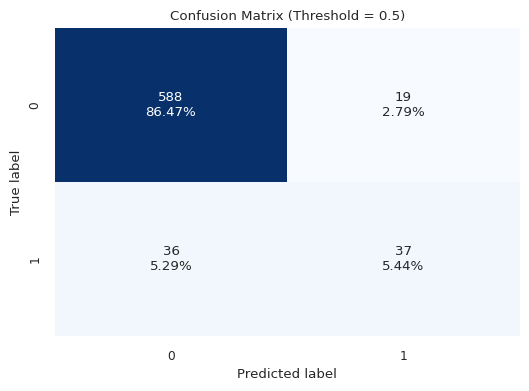

In [35]:
# Calculating model performance on Training Data
lr_train_perf=model_performance_classification(lr_final_model,X_train_significant,y_train, 'LR')
display(HTML('<b>Training Performance:</b><br>' + lr_train_perf.to_html()))

# Calculating model performance on Test Data
lr_test_perf=model_performance_classification(lr_final_model,X_test_significant,y_test, 'LR')
display(HTML('<br><b>Testing Performance:</b><br>' + lr_test_perf.to_html()))

#Creating confusion matrix
display(HTML('<br><b>Confusion Matrix:</b>'))
confusion_matrix_plot(lr_final_model,X_test_significant,y_test)

### Plot ROC Curve

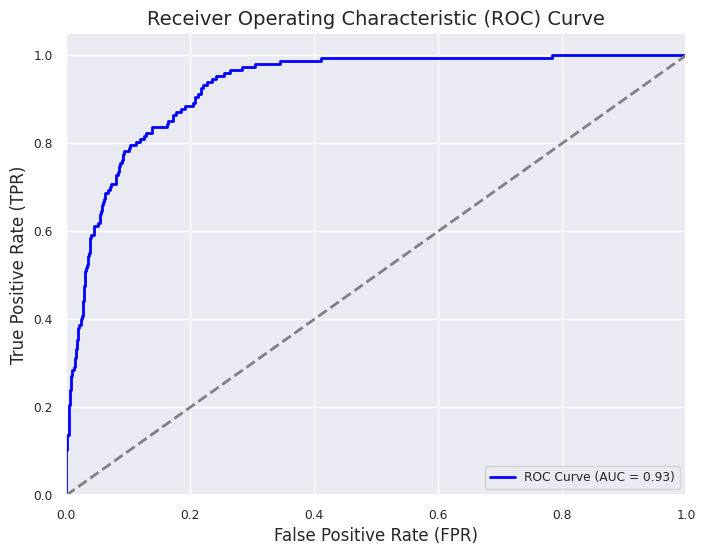

In [36]:
# Plot the ROC curve
plot_roc_curve(lr_final_model, X_train_significant, y_train)

**Observations:**

* **Higher Precision but Lower Recall**: With the default threshold of **0.5**, the model achieves **higher precision** on both training (0.657) and testing (0.661). However, the **recall** is lower (0.442 for training, 0.507 for testing), indicating the model is missing more actual defaults (true positives), as reflected by **36 false negatives** in the test set.

* **F1 Score Trade-off**: The **F1 score** is lower (0.528 for training, 0.574 for testing) compared to the 0.4 threshold, showing that the default threshold does not strike as good a balance between precision and recall.

* **Confusion Matrix Insights**: The **false negatives (36)** and **true positives (37)** in the confusion matrix highlight that the default threshold is conservative in predicting defaults, favoring fewer false positives (**19**) but missing more actual defaults.

* The default threshold of 0.5 focuses more on precision but at the cost of missing more defaults. A lower threshold may provide a better balance, especially in reducing false negatives.

**Next Steps:**
* We will identify the optimal cut-off threshold for the Logistic Regression model and assess its performance, ensuring a better balance between precision and recall for improved default prediction accuracy.

## <a name='lro'>Evaluate Logistic Regression Model Using Optimal Threshold Cut-off</a>

### Find optimum cut-off threshold

In [37]:
# Find best cut-off threshold
lr_best_threshold = find_optimum_cutoff(lr_final_model, X_train_significant, y_train)

# Display the best threshold based on F1 Score
print("Best Threshold:", lr_best_threshold['Threshold'])
print("Performance at Best Threshold:")
display(lr_best_threshold)

Best Threshold: 0.2
Performance at Best Threshold:


,1
Threshold,0.200000
Accuracy,0.896952
Precision,0.511628
Recall,0.748299
F1 Score,0.607735
ROC-AUC,0.930022


### Performance Evaluation using Optimal cut-off for Logistic Regression Model

,Accuracy,Recall,Precision,F1,ROC_AUC
LR Optimal,0.896952,0.748299,0.511628,0.607735,0.930022


,Accuracy,Recall,Precision,F1,ROC_AUC
LR Optimal,0.886765,0.684932,0.480769,0.564972,0.899212


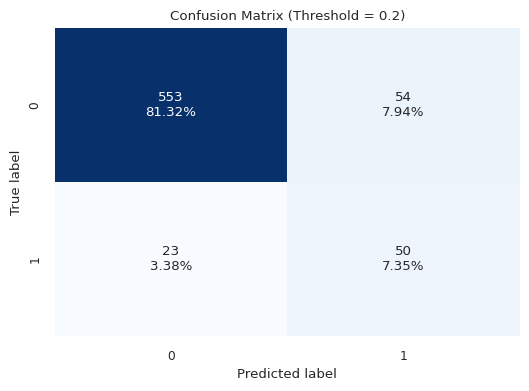

In [38]:
# Calculating model performance on Training Data
lr_train_opt_perf=model_performance_classification(lr_final_model,X_train_significant,y_train, 'LR Optimal', lr_best_threshold['Threshold'])
display(HTML(f"<b>Training Performance with Threshold={lr_best_threshold['Threshold']}:</b><br>" + lr_train_opt_perf.to_html()))

# Calculating model performance on Test Data
lr_test_opt_perf=model_performance_classification(lr_final_model,X_test_significant,y_test, 'LR Optimal', lr_best_threshold['Threshold'])
display(HTML(f"<br><b>Testing Performance with Threshold={lr_best_threshold['Threshold']}:</b><br>" + lr_test_opt_perf.to_html()))

#Creating confusion matrix
display(HTML(f"<br><b>Confusion Matrix with Threshold={lr_best_threshold['Threshold']}:</b>"))
confusion_matrix_plot(lr_final_model,X_test_significant,y_test, lr_best_threshold['Threshold'])

**Observations:**

* **Improved Recall**: The lower threshold of **0.2** significantly improves recall for both the training (**74.83%**) and test datasets (**68.49%**), meaning the model captures a larger proportion of actual defaults, which is important in minimizing missed default cases (false negatives).

* **Trade-off in Precision**: The increased recall comes at the cost of precision, which drops to **51.16%** on the training set and **48.08%** on the test set. This indicates that a higher number of false positives (non-defaults predicted as defaults) are introduced, which could lead to unnecessary interventions.

* **Balanced F1 Score**: The F1 score on both the training (**60.77%**) and test sets (**56.50%**) shows that the model maintains a reasonable balance between recall and precision, although the overall performance has shifted toward prioritizing recall.

* **Model’s Generalization**: The model shows consistent performance across both training and test datasets, with similar trends in recall, precision, and F1 scores. The **ROC-AUC** remains high (over 0.89 on the test set), indicating strong discriminatory ability despite the drop in precision.

* **Confusion Matrix**: The model correctly identifies **50 defaults** but misses **23 actual defaults** (false negatives) in the test data. Additionally, there are **54 false positives**, meaning some non-defaults are being incorrectly flagged as defaults.

* The lower threshold of **0.2** improves the model’s ability to detect defaults (high recall) but introduces more false positives, as indicated by the drop in precision. This threshold may be appropriate if the business goal is to prioritize capturing defaults, even if it means dealing with more false alarms.

**Next Steps:**
We will balance the the dataset using SMOTE technique.

## <a name='smote'>Balancing Data Using SMOTE</a>

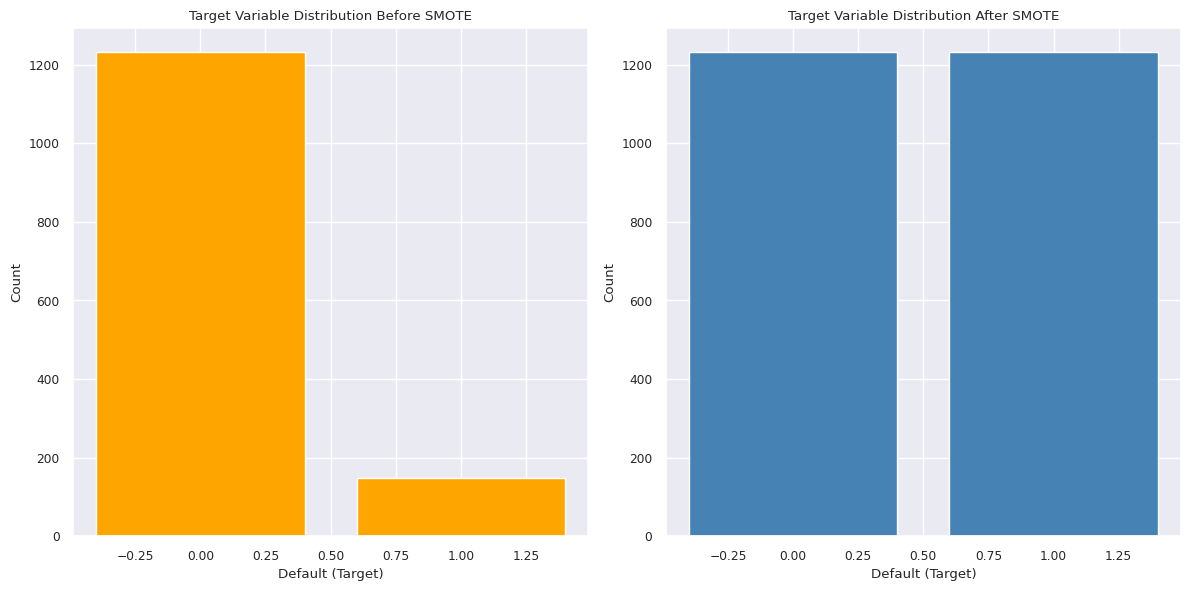

In [39]:
# Apply SMOTE to the training set only
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train_significant, y_train)

# Before applying SMOTE
target_dist_before = Counter(y_train)

# After applying SMOTE
target_dist_after = Counter(y_train_smote)

# Plot the distributions before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot before SMOTE
axes[0].bar(target_dist_before.keys(), target_dist_before.values(), color='orange')
axes[0].set_title('Target Variable Distribution Before SMOTE')
axes[0].set_xlabel('Default (Target)')
axes[0].set_ylabel('Count')

# Plot after SMOTE
axes[1].bar(target_dist_after.keys(), target_dist_after.values(), color='steelblue')
axes[1].set_title('Target Variable Distribution After SMOTE')
axes[1].set_xlabel('Default (Target)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


## <a name='lros'>Logistic Regression Model using Balanced Dataset</a>

Optimization terminated successfully.
         Current function value: 0.309804
         Iterations 8


,Accuracy,Recall,Precision,F1,ROC_AUC
LR Optimal - SMOTE,0.843623,0.983753,0.768401,0.862843,0.939779


,Accuracy,Recall,Precision,F1,ROC_AUC
LR Optimal - SMOTE,0.720588,0.917808,0.266932,0.41358,0.893097


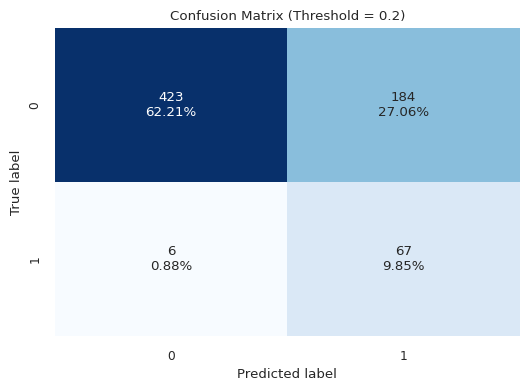

In [40]:
# Combine X_train_smote and y_train_smote into a single DataFrame for statsmodels
train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_significant.columns)
train_smote_df['Default'] = y_train_smote  # Add the target column to the DataFrame

# Build the formula for the logistic regression model
formula = 'Default ~ ' + ' + '.join(X_train_smote.columns)

# Build logistic regression model using statsmodels with the SMOTE dataset
lr_smote_model = SM.logit(formula=formula, data=train_smote_df).fit()

# Calculating model performance on Training Data
lr_train_opt_smote_perf=model_performance_classification(lr_smote_model,X_train_smote,y_train_smote, 'LR Optimal - SMOTE', lr_best_threshold['Threshold'])
display(HTML(f"<b>Training Performance with Threshold={lr_best_threshold['Threshold']}:</b><br>" + lr_train_opt_smote_perf.to_html()))

# Calculating model performance on Test Data
lr_test_opt_smote_perf=model_performance_classification(lr_smote_model,X_test_significant,y_test, 'LR Optimal - SMOTE', lr_best_threshold['Threshold'])
display(HTML(f"<br><b>Testing Performance with Threshold={lr_best_threshold['Threshold']}:</b><br>" + lr_test_opt_smote_perf.to_html()))

#Creating confusion matrix
display(HTML(f"<br><b>Confusion Matrix with Threshold={lr_best_threshold['Threshold']}:</b>"))
confusion_matrix_plot(lr_smote_model,X_test_significant,y_test, lr_best_threshold['Threshold'])

**Observations:**

* **High Recall**: The model achieves a high recall on both the training set (**98.37%**) and test set (**91.78%**), indicating that it is successfully identifying the vast majority of defaults.

* **Trade-off in Precision**: Precision significantly drops on the test set (**26.69%**), showing a high number of false positives, meaning many non-defaults are incorrectly classified as defaults.

* **F1 inconsistency**: The F1 score on the training data is strong at **86.28%**, but drops considerably on the test set **41.36%**, reflecting the trade-off between high recall and lower precision.

* **Confusion Matrix Insight**: The model correctly predicts **67 defaults** but generates **184 false positives**, meaning the cost of false alarms is high with this threshold.

* **Model’s Ability to Distinguish**: The **ROC-AUC** remains strong at **0.89**, indicating the model still has good overall discriminatory power between defaults and non-defaults, despite the precision-recall trade-off.

* Overall, while the model performs well in terms of recall, the large drop in precision and overfitting seen in the F1 score indicate it is not a robust model for production use without further tuning. A more balanced model that reduces false positives while maintaining a high recall should be the goal.

**Next Steps:**
* **Try Different Algorithms:** After SMOTE, you can build models like Random Forest and LDA, which may perform better in terms of recall and balancing between precision and recall.

## <a name='rfo'>Random Forest Model Using Original Data</a>

,Accuracy,Recall,Precision,F1,ROC_AUC
RF - Original,1.0,1.0,1.0,1.0,1.0


,Accuracy,Recall,Precision,F1,ROC_AUC
RF - Original,0.923529,0.465753,0.723404,0.566667,0.722168


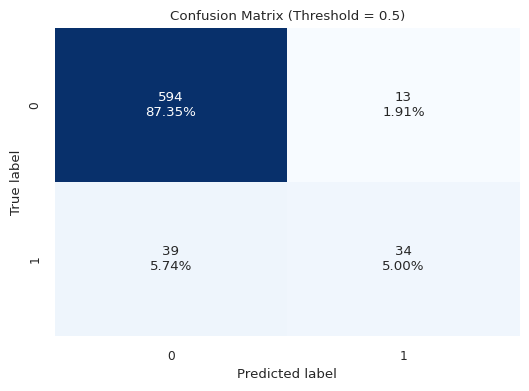

In [41]:
# Build Random Forest model
rf_model_org = RandomForestClassifier(random_state=42)
rf_model_org.fit(X_train_significant, y_train)

# Calculating model performance on Training Data
rf_train_org_perf=model_performance_classification(rf_model_org,X_train_significant,y_train, 'RF - Original')
display(HTML(f"<b>Training Performance:</b><br>" + rf_train_org_perf.to_html()))

# Calculating model performance on Test Data
rf_test_org_perf=model_performance_classification(rf_model_org,X_test_significant,y_test, 'RF - Original')
display(HTML(f"<br><b>Testing Performance:</b><br>" + rf_test_org_perf.to_html()))

#Creating confusion matrix
display(HTML(f"<br><b>Confusion Matrix:</b>"))
confusion_matrix_plot(rf_model_org,X_test_significant,y_test)

**Observations:**

* **Overfitting on Training Data**: The **training performance** shows perfect scores across all metrics (**accuracy, recall, precision, F1, and ROC-AUC** all equal to 1), indicating that the model has likely overfitted the training data. This suggests the Random Forest model is memorizing the training set but may not generalize well to unseen data.

* **Moderate Generalization on Test Data**: While the **test accuracy (0.924)** is high, the **recall (0.466)** is relatively low, meaning the model is missing a significant number of actual defaults (**39 false negatives**). The **precision (0.723)** is good, indicating that when the model predicts a default, it is often correct.

* **Confusion Matrix Insights**: The model performs well at identifying non-defaults (**594 true negatives** and **13 false positives**) but struggles with correctly identifying defaults, as shown by the **39 false negatives**. This indicates that the model favors predicting non-defaults over capturing defaults, even with the optimized threshold.

* In summary, while the model performs well in terms of precision and accuracy, it overfits the training data and struggles with recall on the test set, missing a notable portion of defaults. Further tuning or balancing methods may be needed to improve recall on the test set.

**Next Steps:**
* Build Random Forest Model using Balanced Data Sets.

## <a name='rfs'>Random Forest Model Using Balanced Data</a>

,Accuracy,Recall,Precision,F1,ROC_AUC
RF - Balanced,1.0,1.0,1.0,1.0,1.0


,Accuracy,Recall,Precision,F1,ROC_AUC
RF - Balanced,0.897059,0.643836,0.516484,0.573171,0.785674


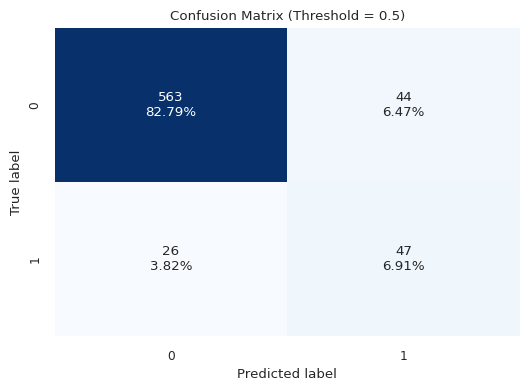

In [42]:
# Build Random Forest model
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Calculating model performance on Training Data
rf_train_smote_perf=model_performance_classification(rf_model_smote,X_train_smote,y_train_smote, 'RF - Balanced')
display(HTML(f"<b>Training Performance:</b><br>" + rf_train_smote_perf.to_html()))

# Calculating model performance on Test Data
rf_test_smote_perf=model_performance_classification(rf_model_smote,X_test_significant,y_test, 'RF - Balanced')
display(HTML(f"<br><b>Testing Performance:</b><br>" + rf_test_smote_perf.to_html()))

#Creating confusion matrix
display(HTML(f"<br><b>Confusion Matrix:</b>"))
confusion_matrix_plot(rf_model_smote,X_test_significant,y_test)

**Observations:**

* **Overfitting on Training Data**: As with the original dataset, the **training performance** shows perfect metrics (accuracy, recall, precision, F1, and ROC-AUC all equal to 1). This suggests the model has completely overfitted the training data, especially after applying **SMOTE** to balance the dataset.

* **Improved Recall, Lower Precision on Test Set**: On the **test set**, the model shows **improved recall (0.644)** compared to the unbalanced version, meaning it is now better at identifying defaults (47 true positives). However, this comes at the cost of lower **precision (0.516)**, indicating more false positives (**44**), which means the model is predicting defaults for non-default companies more often.

* **Balanced but Moderate Performance**: The **F1 score (0.573)** and **ROC-AUC (0.786)** are reasonable, but the performance metrics show that the model is slightly favoring capturing more defaults (higher recall) while trading off precision and increasing the number of false positives.

* **Confusion Matrix Insights**: The model captures **47 true positives** and has **26 false negatives**, showing improvement in capturing defaults compared to the unbalanced version. However, the **44 false positives** indicate that the model sacrifices precision to improve recall, misclassifying many non-defaults as defaults.

* In summary, the model's recall improved after balancing the data, but it comes at the cost of increased false positives and lower precision. This makes the model more suitable for scenarios where capturing defaults is prioritized over avoiding false positives. Further tuning may help improve the balance between precision and recall.

**Next Steps:**
* Build Hyperparameter Tuned Random Forest Model

## <a name='rfst'>Random Forest Model Using Balanced Data with Hyperparameter Tuning</a>

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 50}


,Accuracy,Recall,Precision,F1,ROC_AUC
RF - Balanced - Tuned,0.952071,0.982128,0.926437,0.95347,0.952071


,Accuracy,Recall,Precision,F1,ROC_AUC
RF - Balanced - Tuned,0.882353,0.780822,0.471074,0.587629,0.837693


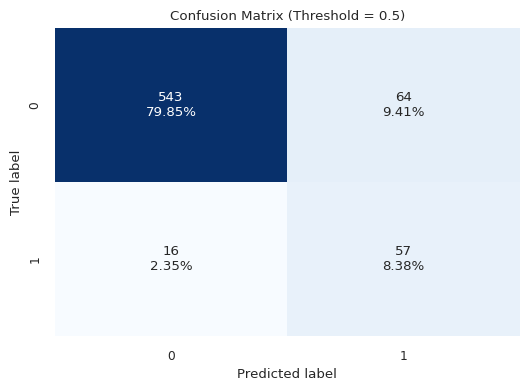

In [43]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [25, 50],               # Number of trees in the forest
    'max_depth': [3, 5, 7],              # Maximum depth of the tree
    'min_samples_split': [15, 30, 45],             # Minimum number of samples required to split a node
    'min_samples_leaf': [5, 10, 15],               # Minimum number of samples required to be at a leaf node
}

# Initialize the RandomForestClassifier
rf_smote_tuned = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_smote_tuned, param_grid=param_grid)

# Fit the model with GridSearchCV
grid_search.fit(X_train_smote, y_train_smote)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best Hyperparameters: {best_params}")

# Calculating model performance on Training Data
rf_train_smote_tuned_perf=model_performance_classification(best_rf_model,X_train_smote,y_train_smote, 'RF - Balanced - Tuned')
display(HTML(f"<b>Training Performance:</b><br>" + rf_train_smote_tuned_perf.to_html()))

# Calculating model performance on Test Data
rf_test_smote_tuned_perf=model_performance_classification(best_rf_model,X_test_significant,y_test, 'RF - Balanced - Tuned')
display(HTML(f"<br><b>Testing Performance:</b><br>" + rf_test_smote_tuned_perf.to_html()))

#Creating confusion matrix
display(HTML(f"<br><b>Confusion Matrix:</b>"))
confusion_matrix_plot(best_rf_model,X_test_significant,y_test)

**Observations:**

* **Strong Training Performance**: The **tuned Random Forest model** performs well on the **training set** with high metrics across the board—**accuracy (0.952)**, **recall (0.982)**, and **precision (0.926)**. Unlike the overfitting seen in previous models, the slightly less-than-perfect metrics suggest better regularization and a good fit on the training data.

* **Improved Recall on Test Set**: The **recall (0.781)** on the test set indicates that the model is capturing more actual defaults, with **57 true positives** and only **16 false negatives**. This shows that the model's ability to identify defaults has significantly improved after tuning.

* **Trade-off in Precision**: While recall has improved, the **precision (0.471)** on the test set is relatively low, with **64 false positives**. This indicates that the model is still over-predicting defaults, sacrificing precision to achieve higher recall.

* **Confusion Matrix Insights**: The confusion matrix shows the model captures **57 true positives** but misclassifies **64 false positives**, highlighting the precision-recall trade-off. The model is now more focused on capturing defaults, but this comes at the cost of more non-defaults being incorrectly classified as defaults.

* Overall, the tuning has resulted in a model that significantly improves default detection (recall) but still needs further optimization to reduce false positives and improve precision.

**Next Steps:**
* Given the current results from Logistic Regression and Random Forest, you should now explore Linear Discriminant Analysis (LDA) to see if it offers a better balance between precision and recall, or improves the ROC-AUC and F1 scores.

## <a name='lda'>Linear Discriminant Analysis Model</a>

,Accuracy,Recall,Precision,F1,ROC_AUC
LDA - Balanced,0.859464,0.872461,0.850356,0.861267,0.859464


,Accuracy,Recall,Precision,F1,ROC_AUC
LDA - Balanced,0.832353,0.739726,0.362416,0.486486,0.791609


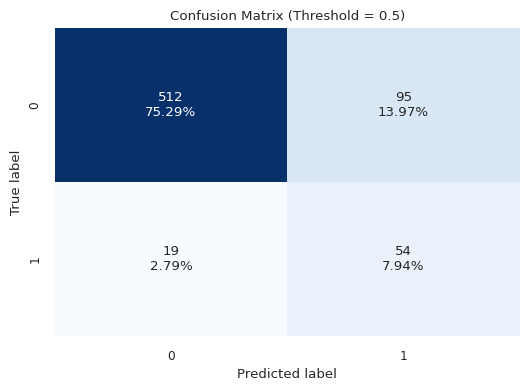

In [44]:
# Initialize and fit LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_smote, y_train_smote)

# Calculating model performance on Training Data
lda_train_perf=model_performance_classification(lda,X_train_smote,y_train_smote, 'LDA - Balanced')
display(HTML(f"<b>Training Performance:</b><br>" + lda_train_perf.to_html()))

# Calculating model performance on Test Data
lda_test_perf=model_performance_classification(lda,X_test_significant,y_test, 'LDA - Balanced')
display(HTML(f"<br><b>Testing Performance:</b><br>" + lda_test_perf.to_html()))

#Creating confusion matrix
display(HTML(f"<br><b>Confusion Matrix:</b>"))
confusion_matrix_plot(lda,X_test_significant,y_test)

**Observations:**

* **Balanced Training Performance**: The **LDA model** shows good balance on the **training set** with **accuracy (0.859)**, **recall (0.872)**, and **precision (0.850)**. This indicates that the model performs consistently well in identifying defaults (high recall) while maintaining solid precision.

* **Moderate Performance on Test Set**: On the **test set**, the model achieves **recall (0.740)**, capturing most of the defaults (**54 true positives**), but **precision drops to 0.362**, reflecting a high number of **false positives (95)**. This trade-off indicates the model is favoring recall, leading to many non-defaults being classified as defaults.

* **Confusion Matrix Insights**: The confusion matrix shows that the model captures **54 true positives** but misclassifies **95 false positives** and has **19 false negatives**. The high number of false positives suggests that the LDA model sacrifices precision in favor of detecting more defaults.

* **Overall Performance**: The **F1 score (0.486)** and **ROC-AUC (0.792)** on the test set reflect the model's focus on recall, but the low precision shows that the model needs further tuning to balance false positives and improve overall performance.

* The LDA model is more focused on maximizing recall but suffers from a high rate of false positives, making it less ideal for situations where precision is crucial. Further tuning might help in improving the trade-off between recall and precision.

# <a name='mcs'>Model Comparison and Selection</a>
* Model Comparison
* Final Model Selection
* List Important Features

## Model Comparison using Performance Metrics

In [45]:
# List of all the training performance DataFrames
training_perf = [
    lr_train_perf,
    lr_train_opt_perf,
    lr_train_opt_smote_perf,
    rf_train_org_perf,
    rf_train_smote_perf,
    rf_train_smote_tuned_perf,
    lda_train_perf
]

# Concatenate the DataFrames along rows
training_perf_combined = pd.concat(training_perf, axis=0)

# Display the concatenated DataFrame
display(HTML('<br><b>Combined Performance Metrics on Training Dataset:</b><br>'))
display(training_perf_combined)

# List of all the training performance DataFrames
test_perf = [
    lr_test_perf,
    lr_test_opt_perf,
    lr_test_opt_smote_perf,
    rf_test_org_perf,
    rf_test_smote_perf,
    rf_test_smote_tuned_perf,
    lda_test_perf
]

# Concatenate the DataFrames along rows
test_perf_combined = pd.concat(test_perf, axis=0)

# Display the concatenated DataFrame
display(HTML('<br><b>Combined Performance Metrics on Test Dataset:</b><br>'))
display(test_perf_combined)

,Accuracy,Recall,Precision,F1,ROC_AUC
LR,0.915820,0.442177,0.656566,0.528455,0.930022
LR Optimal,0.896952,0.748299,0.511628,0.607735,0.930022
LR Optimal - SMOTE,0.843623,0.983753,0.768401,0.862843,0.939779
RF - Original,1.000000,1.000000,1.000000,1.000000,1.000000
RF - Balanced,1.000000,1.000000,1.000000,1.000000,1.000000
RF - Balanced - Tuned,0.952071,0.982128,0.926437,0.953470,0.952071
LDA - Balanced,0.859464,0.872461,0.850356,0.861267,0.859464


,Accuracy,Recall,Precision,F1,ROC_AUC
LR,0.919118,0.506849,0.660714,0.573643,0.899212
LR Optimal,0.886765,0.684932,0.480769,0.564972,0.899212
LR Optimal - SMOTE,0.720588,0.917808,0.266932,0.413580,0.893097
RF - Original,0.923529,0.465753,0.723404,0.566667,0.722168
RF - Balanced,0.897059,0.643836,0.516484,0.573171,0.785674
RF - Balanced - Tuned,0.882353,0.780822,0.471074,0.587629,0.837693
LDA - Balanced,0.832353,0.739726,0.362416,0.486486,0.791609


**Observations on Model Performance:**

* **Logistic Regression (LR)**:
  - **Base Model**: The basic Logistic Regression model has decent performance on both training and test sets, with **F1 scores of 52.85% (train)** and **57.36% (test)**. However, the **recall is relatively low (50.68% on the test set)**, meaning it misses many default cases.
  - **Optimal Threshold**: When applying an optimal threshold, the recall improves to **68.49% on the test set**, but precision drops, indicating more false positives. The **F1 score on the test set** also decreases slightly compared to the base model.
  - **SMOTE Balanced**: While the recall becomes very high (**91.78% on the test set**), precision drops drastically to **26.69%**, and the F1 score plummets to **41.36%**, showing a significant trade-off where too many non-defaults are misclassified as defaults.

* **Random Forest (RF)**:
  - **Original Model**: The Random Forest model on the original data performs perfectly on the training set (**100% in all metrics**), but this indicates clear **overfitting**. On the test set, the model's recall is low (**46.57%**), meaning it misses more default cases, though precision is relatively high (**72.34%**).
  - **Balanced RF**: Balancing the dataset with SMOTE improves the **recall on the test set** to **64.38%**, but precision drops to **51.65%**. The **F1 score** is similar to the base Logistic Regression model, showing improvement in catching defaults but introducing more false positives.
  - **Tuned RF Model**: Tuning the balanced RF model improves the **recall to 78.08%** on the test set, while precision drops to **47.11%**. The F1 score is **58.76%**, showing a better balance between recall and precision compared to the untuned version. This model offers strong performance overall.

* **LDA (Linear Discriminant Analysis)**:
  - The LDA model trained on balanced data shows good recall (**73.97%** on the test set), but its precision is quite low (**36.24%**), leading to a low F1 score of **48.65%**. The model struggles to maintain a balance between capturing defaults and reducing false positives.

**Recommendations on Model Selection:**

* **Random Forest Tuned on Balanced Data** is the best-performing model overall, with the highest **recall** on the test set (**78.08%**) and a reasonable balance of **F1 score (58.76%)**. Although the precision is somewhat low, it outperforms other models in capturing default cases, making it ideal for **credit risk management** where identifying defaults is a priority. The tuned model also shows improved **ROC-AUC** of **83.77%**, indicating good discriminative power.
  
* **Logistic Regression with SMOTE** achieves high recall but suffers from extremely low precision (**26.69%**), making it less reliable due to the high number of false positives. This model may lead to inefficient business decisions with too many non-defaults flagged as risky.

* **LDA** offers reasonable recall but significantly underperforms in precision, making it less suitable for this use case compared to Random Forest.

## Final Model Selection

* The **Random Forest Tuned Model** on **balanced data** is the best choice for this project, as it strikes a better balance between capturing defaults (high recall) and keeping false positives at a manageable level. For business purposes, this model minimizes missed defaults while maintaining a reasonable level of precision, making it the most robust model for **credit risk management**.

## List Important Features using Selected Model

,Feature,Importance
8,Retained_Earnings_to_Total_Assets,0.291280
3,Total_debt_to_Total_net_worth,0.160105
11,Equity_to_Liability,0.098624
2,Continuous_Net_Profit_Growth_Rate,0.098357
10,Cash_Turnover_Rate,0.058030
9,Total_expense_to_Assets,0.053564
5,Allocation_rate_per_person,0.048431
7,Long_term_Liability_to_Current_Assets,0.048185
1,Interest_bearing_debt_interest_rate,0.045736
4,Accounts_Receivable_Turnover,0.033491


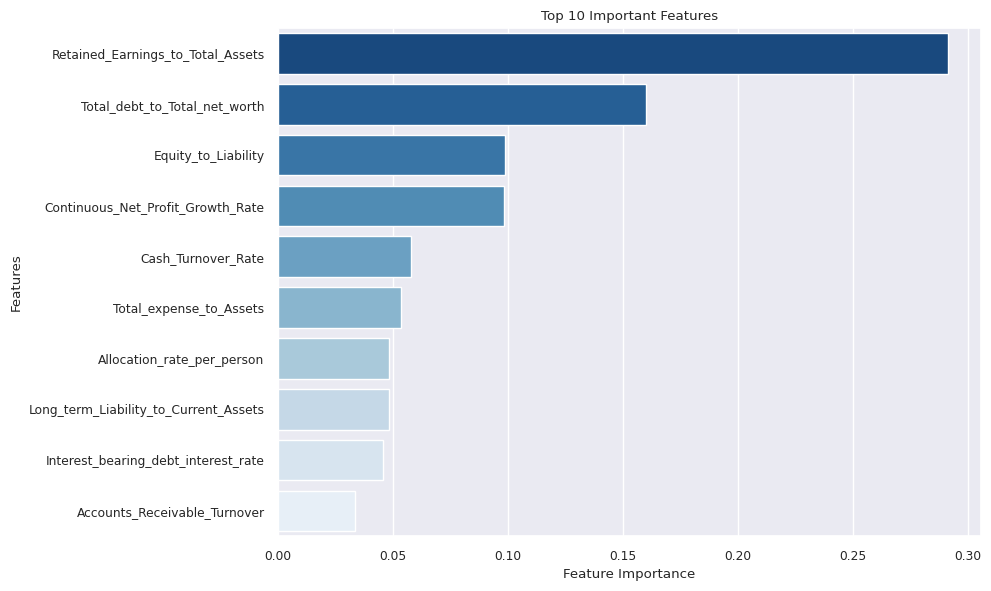

In [46]:
# Get feature importance
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': X_train_significant.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display important features
display(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='Blues_r')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


**Observations:**

* **Retained Earnings to Total Assets (0.291)**: This is the most important feature in the model, indicating that companies with higher retained earnings relative to their assets are less likely to default. Strong retained earnings improve financial stability.

* **Total Debt to Total Net Worth (0.160)**: A higher debt-to-net-worth ratio suggests higher leverage, increasing the risk of default. This feature significantly impacts the model’s ability to predict defaults.

* **Equity to Liability (0.099)**: Companies with a higher equity-to-liability ratio are more likely to have a stable financial position, reducing the likelihood of default. This feature reflects a company’s ability to manage its liabilities with equity.

* **Continuous Net Profit Growth Rate (0.098)**: Consistent profit growth is a key indicator of financial health. Companies with higher growth rates are less likely to default, making this feature a strong predictor of financial stability.

* **Cash Turnover Rate (0.058)**: A higher cash turnover rate implies better efficiency in using cash to generate revenue, reducing default risk. This feature suggests that liquidity management is important in avoiding financial distress.

* **Total Expense to Assets (0.054)**: Higher expenses relative to assets can strain a company’s financial resources, increasing the risk of default. This feature helps the model assess the company’s cost structure.

These features together provide a comprehensive view of a company’s financial health, with a strong emphasis on profitability, leverage, and liquidity management.

# <a name='ir'>Insights and Recommendations</a>
* Key Insights
* Business Recommendations

## Key Insights

- **Imbalanced Default Distribution**: The dataset showed a significant imbalance between defaults and non-defaults, with far fewer defaults. This necessitated the use of **SMOTE** to balance the data and ensure the models could effectively learn from the minority class, leading to improved recall across models.

- **Feature Distributions and Outliers**: During the **EDA**, skewed distributions and outliers were observed in key financial metrics like **Retained Earnings to Total Assets** and **Total Debt to Total Net Worth**. These variables were critical in understanding financial health and were treated to ensure better model performance.

- **Correlation and Multicollinearity Management**: Correlation analysis showed strong relationships between variables like **Retained Earnings to Total Assets** and **Equity to Liability**. These were highly predictive of defaults, and redundant features were removed to reduce multicollinearity, improving model stability.

- **Retained Earnings to Total Assets**: This remained the top predictor of default risk throughout the model-building process. Companies with higher retained earnings relative to their assets had a lower likelihood of default, making this metric a critical factor in financial stability.

- **Total Debt to Total Net Worth**: This feature consistently indicated higher default risk for companies with higher leverage. It highlights the importance of managing debt levels relative to equity to reduce financial vulnerability.

- **Model Comparison and Performance**: The **Random Forest Tuned Model** on balanced data provided the best overall performance, with high recall and a balanced F1 score. This model was superior in identifying defaults compared to **Logistic Regression** and **LDA**, while also maintaining reasonable precision.

- **Trade-offs with SMOTE**: While SMOTE significantly improved recall in models like **Random Forest** and **Logistic Regression**, it led to a decrease in precision, increasing false positives. Careful management of false positives is needed, especially in cost-sensitive scenarios.

- **Threshold Optimization in Logistic Regression**: By adjusting the threshold to **0.2**, recall improved across both train and test sets, ensuring more defaults were captured. However, this led to a further drop in precision, which should be managed based on business needs.

- **Cash Flow and Liquidity**: Features like **Cash Turnover Rate** and **Total Expense to Assets** were key indicators of a company’s liquidity and expense management. Efficient cash management was closely associated with lower default risks, making these metrics essential for financial assessment.

## Business Recommendations

- **Prioritize Debt Management**: Encourage businesses to maintain healthy debt levels in relation to their net worth. Companies with high leverage are at a greater risk of default, so improving debt management strategies can significantly enhance financial stability.

- **Focus on Strengthening Retained Earnings**: Businesses should aim to increase retained earnings to serve as a buffer against potential financial distress. Retaining more profits, rather than excessive dividend payouts, can improve long-term resilience and reduce default risk.

- **Optimize Capital Structure**: Improving the **equity-to-liability ratio** is essential. Companies with a stronger equity base relative to liabilities are more financially stable, reducing their default risk and providing more flexibility for future growth.

- **Improve Profitability and Cost Management**: Companies need to ensure consistent profit growth while keeping a close watch on expenses. Operational efficiency, sales growth, and cost control are critical to avoiding defaults, as highlighted by important features in the model.

- **Cash Flow Monitoring**: Proactively managing **cash flow** and liquidity is crucial. Companies that efficiently manage cash turnover and control expenses relative to assets are less likely to default, making these metrics critical for long-term financial health.

- **Leverage Early Warning Systems**: Use the **Random Forest Tuned Model** as an early warning system to flag high-risk companies. Its strong recall ensures that defaults are identified early, enabling timely interventions to mitigate financial losses.

- **Manage False Positives for Strategic Decisions**: Given the increase in false positives from SMOTE, it is important to balance precision with recall, especially in cost-sensitive environments. Additional analysis or manual review may be necessary to filter out low-risk companies flagged as defaults.

- **Continuous Model Monitoring and Tuning**: Regularly monitor the model’s performance using updated data and adjust the threshold or parameters as necessary. The business environment may shift, requiring recalibration of the model to maintain optimal performance.

- **Engage High-Risk Clients**: Utilize the insights gained from feature importance to engage with high-risk clients proactively. For example, companies with weak retained earnings or high debt levels could benefit from financial advisory services to strengthen their financial positions.

- **Expand Data for Robust Validation**: To ensure the model generalizes well across various business sectors, it’s important to expand testing to additional datasets or real-world data. This will help refine the model's applicability and performance across different market conditions and industries.